## ENPH 344 Quantum Mechanics
### Quantum Computing Using Xanadu's Package Penny Lane

### Solutions to The Xanadu Codebook for the PennyLane library 
### Currently contains Modules T, I and A
Nathan Pacey

18njp@queensu.ca

In [25]:
!pip install pennylane

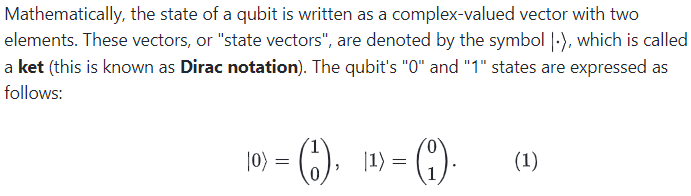

In [26]:
import numpy as np

### Codercise I.1.1. 

Suppose we are given an unnormalized quantum state

We can turn this into an equivalent, valid quantum state by normalizing it. Write a function that, given  and , normalizes this state to

In [27]:
# Here are the vector representations of |0> and |1>, for convenience
ket_0 = np.array([1, 0])
ket_1 = np.array([0, 1])

def normalize_state(alpha, beta):
    return np.array([alpha/((alpha**2+beta**2)**0.5), beta/((alpha**2+beta**2)**0.5)])

### Codercise I.1.2 

Write a function to compute the inner product between two arbitrary states. Then, use it to verify that  and  form an orthonormal basis, i.e., the states are normalized and orthogonal.

In [28]:
def inner_product(state_1, state_2):
    return np.dot(np.conjugate(np.transpose(state_1)), state_2)


print(f"<0|0> = {inner_product(ket_0, ket_0)}")
print(f"<0|1> = {inner_product(ket_0, ket_1)}")
print(f"<1|0> = {inner_product(ket_1, ket_0)}")
print(f"<1|1> = {inner_product(ket_1, ket_1)}")

<0|0> = 1
<0|1> = 0
<1|0> = 0
<1|1> = 1


### Codercise I.1.3. 
The function below takes a quantum state vector as input. Complete the function to simulate the outcomes of an arbitrary number of quantum measurements, i.e., return a list of samples  or  based on the probabilities given by the input state.

In [29]:
def measure_state(state, num_meas):
    return np.random.choice([0,1], size = num_meas, p = [abs(state[0])**2,abs(state[1])**2])

In [30]:
print(measure_state([1/np.sqrt(2), 1/np.sqrt(2)], 11))


[1 1 0 0 1 1 1 1 0 1 0]


### Codercise I.1.4. 
U is a **unitary** matrix where UU^dagger = I

Complete the function below to apply the provided quantum operation U to an input state.

In [31]:
U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

def apply_u(state):
    return np.dot(state,U)

In [32]:
apply_u([1/np.sqrt(2), 1/np.sqrt(2)])

array([1., 0.])

### Codercise I.1.5. 
Use the functions below to simulate a quantum algorithm that does the following:

In [33]:
# Defining a Quantum Operation
U = np.array([[1, 1], [1, -1]]/np.sqrt(2))
def initialize_state():
    # Prepare the state |0>
    q0 = np.array([1, 0])
    return q0
    
def apply_u(state):
    # Apply a Quantum Operation U
    return np.dot(U, state)
    
def measure_state(state, num_meas):
    # Measure a Quantum State 'num_meas' times.
    prob_0 = np.square(np.abs(state[0]))
    prob_1 = np.square(np.abs(state[1]))
    meas_outcome = np.random.choice([0, 1], p = [prob_0, prob_1], size=num_meas)
    return meas_outcome
    
def quantum_algorithm():
    q0 = initialize_state()
    apply_u(q0)
    return measure_state(q0, 100)
    
print(quantum_algorithm)

<function quantum_algorithm at 0x7f9624cb10d0>


### Codercise I.2.1. 
The code below is a quantum function with all the gates from the above circuit (which we reproduce here for convenience). However, the gates are out of order! Re-arrange the lines of the function to match the order of operations in the circuit.

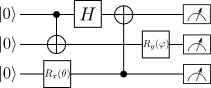

In [34]:
import pennylane as qml

def my_circuit(theta, phi): 
    ##################
    # YOUR CODE HERE #
    ##################

    # REORDER THESE 5 GATES TO MATCH THE CIRCUIT IN THE PICTURE

    qml.CNOT(wires=[0, 1])
    qml.RX(theta, wires=2)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[2, 0])
    qml.RY(phi, wires=1)

    
    # This is the measurement; we return the probabilities of all possible output states
    # You'll learn more about what types of measurements are available in a later node
    return qml.probs(wires=[0, 1, 2])


### Codercise I.2.2. 
Complete the quantum function in the PennyLane code below to implement the following quantum circuit. We'll then construct a QNode, and run the circuit on the provided device.

In [35]:
# This creates a device with three wires on which PennyLane can run computations
dev = qml.device("default.qubit", wires=3)


def my_circuit(theta, phi, omega):

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT BY ADDING THE GATES

    # Here are two examples, so you can see the format:
    # qml.CNOT(wires=[0, 1])
    # qml.RX(theta, wires=0)
    
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])


    return qml.probs(wires=[0, 1, 2])


# This creates a QNode, binding the function and device
my_qnode = qml.QNode(my_circuit, dev)

# We set up some values for the input parameters
theta, phi, omega = 0.1, 0.2, 0.3

### Codercise I.2.3. 
The quantum function below implements the circuit from the previous exercise. Apply a decorator to the quantum function to construct a QNode, then run it using the provided input parameters.

In [36]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# DECORATE THE FUNCTION BELOW TO TURN IT INTO A QNODE
@qml.qnode(dev)
def my_circuit(theta, phi, omega):
    qml.RX(theta, wires=0)
    qml.RY(phi, wires=1)
    qml.RZ(omega, wires=2)
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 0])
    return qml.probs(wires=[0, 1, 2])


theta, phi, omega = 0.1, 0.2, 0.3
my_circuit(theta, phi, omega)

tensor([9.87560268e-01, 0.00000000e+00, 0.00000000e+00, 2.47302134e-03,
        2.48960206e-05, 0.00000000e+00, 0.00000000e+00, 9.94181506e-03], requires_grad=True)

### Codercise I.3.1. 
Complete the quantum function below to create a circuit that applies U to the qubit and returns its state. (Compare this to the earlier function apply_u that you wrote - isn't it nice to not have to worry about the matrix arithmetic?)

In [37]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def apply_u():

    ##################
    # YOUR CODE HERE #
    ##################

    # USE QubitUnitary TO APPLY U TO THE QUBIT
    
    qml.QubitUnitary(U, wires=0)


    # Return the state
    return qml.state()

### Codercise I.3.2. 
Apply the Rot operation to a qubit using the input parameters. Then, complete the QNode to return the quantum state vector, using qml.state().

In [38]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_u_as_rot(phi, theta, omega):

    ##################
    # YOUR CODE HERE #
    ##################
    
    # APPLY A ROT GATE USING THE PROVIDED INPUT PARAMETERS
    
    # RETURN THE QUANTUM STATE VECTOR
    qml.Rot(phi, theta, omega, wires=0)


    return qml.state()

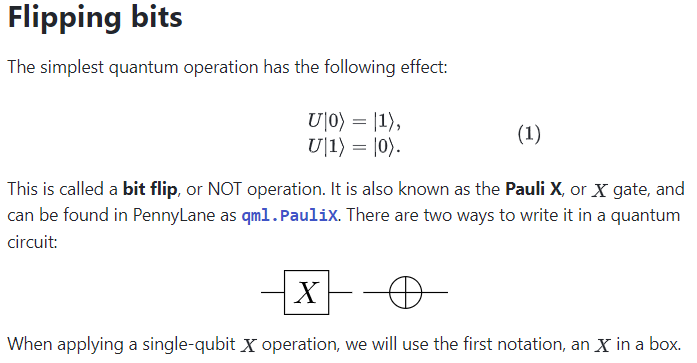

### Codercise I.4.1. 
A common use of the  gate is in initializing the state of a qubit at the beginning of an algorithm. Quite often, we would like our qubits to start in state  (which is the default in PennyLane), however there are many cases where we instead would like to start from . Complete the function below by using qml.PauliX to initialize the qubit's state to  or  based on an input flag. Then, use qml.QubitUnitary to apply the provided U.

In [39]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)

@qml.qnode(dev)
def varied_initial_state(state):
    if (state):
        qml.PauliX(wires=0)
    qml.QubitUnitary(U, wires=0)


    return qml.state()


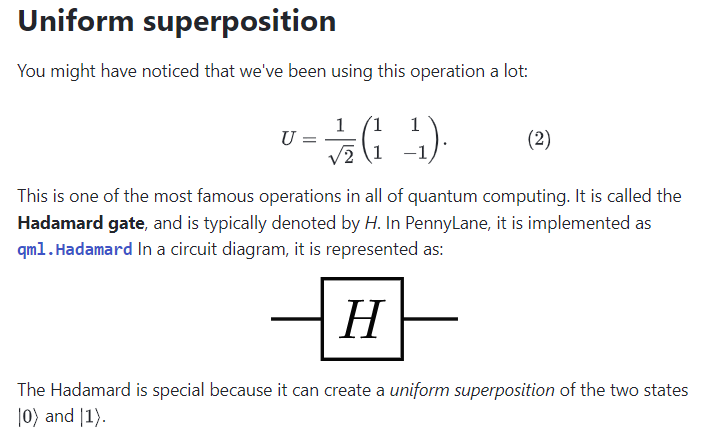

### Codercise I.4.2. 
What do you think is meant by uniform superposition? Let's explore this using PennyLane. Complete the quantum function below such that it:

applies a Hadamard gate to the qubit,
returns the state of the qubit with qml.state.

In [40]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires = 0)
    # RETURN THE STATE
    return qml.state()


### Codercise I.4.3. 
Combining your code from codercises I.4.1, and I.4.2, apply the Hadamard gate to both  and . What do the two different output states look like? Do you notice anything special about them?


In [41]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.
    
    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state
    if state:
        qml.PauliX(wires=0)

    # APPLY THE HADAMARD
    qml.Hadamard(wires = 0)
    # RETURN THE STATE
    return qml.state()
    

print(apply_hadamard_to_state(0))
print(apply_hadamard_to_state(1))


[0.70710678+0.j 0.70710678+0.j]
[ 0.70710678+0.j -0.70710678+0.j]


### Codercise I.4.4. 
Now let's combine what we've just learned. Create a device with one qubit. Then, write a QNode (from scratch!) that applies the following circuit and returns the state.

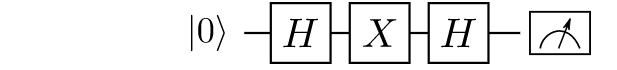

Determine its effect on the two basis states. What do you think this operation does? (We'll discuss this further in the next node).

The signature of your function should be:
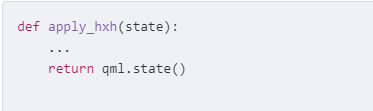
where as in the previous exercises, state is an integer that indicates which basis state to prepare.



In [42]:
##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)

# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
@qml.qnode(dev)
def apply_hxh(state):
    if state:
        qml.PauliX(wires=0)
        
    qml.Hadamard(wires = 0)
    qml.PauliX(wires=0)
    qml.Hadamard(wires = 0)
    return qml.state()


# Print your results
print(apply_hxh(0))
print(apply_hxh(1))


[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


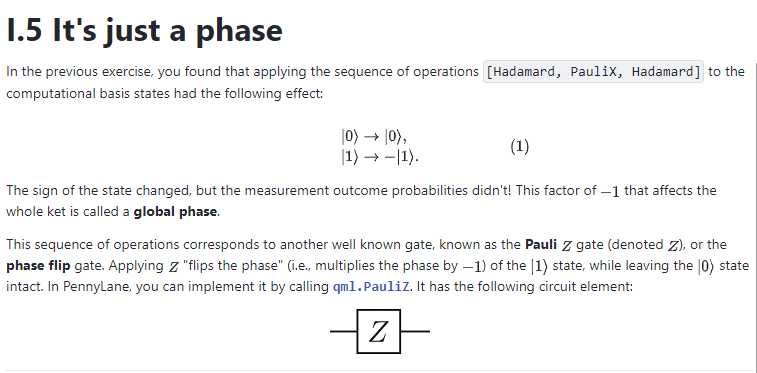

### Codercise I.5.1. 
Write a QNode that applies qml.PauliZ to the  state and returns the state. What state is this? How do the measurement probabilities differ from those of ?

In [43]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires = 0)
    
    # APPLY PAULI Z
    qml.PauliZ(wires=0)

    # RETURN THE STATE
    return qml.state()

print(apply_z_to_plus())


[ 0.70710678+0.j -0.70710678+0.j]


### Codercise I.5.2. 
Write a QNode that uses qml.RZ to simulate a qml.PauliZ operation and return the state. Apply it to the  state to check your work.

In [44]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(wires=0)

    # APPLY RZ
    qml.RZ(np.pi, wires = 0)
    # RETURN THE STATE
    return qml.state()


### Codercise I.5.3. 
Adjoints in PennyLane can be computed by applying the qml.adjoint transform to an operation before specifying its parameters and wires. For example,
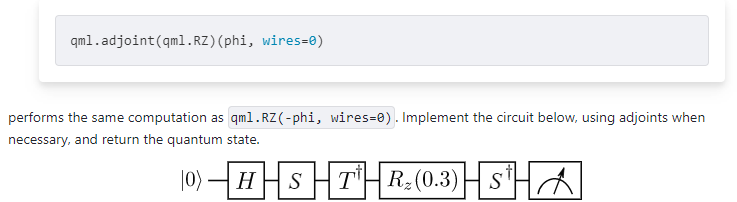

In [45]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires = 0)

    # IMPLEMENT THE CIRCUIT
    qml.S(wires = 0)
    qml.adjoint(qml.T)(wires=0)
    qml.RZ(0.3, wires = 0)
    qml.adjoint(qml.S)(wires=0)

    # RETURN THE STATE

    return qml.state()


### Codercise I.5.4. 
The  gate plays an important role in more advanced quantum computing topics; specifically, it is a required operation in some fault-tolerant frameworks. However, it is much more resource intensive to implement in those frameworks than other gates, and therefore a common task in quantum circuit design is minimization of the -count and -depth (i.e., the number of layers of depth in a circuit which contain a /). Many such tools for optimizing quantum circuits are automated, however we can work out a simple example by hand. Suppose that we want to implement the following circuit:

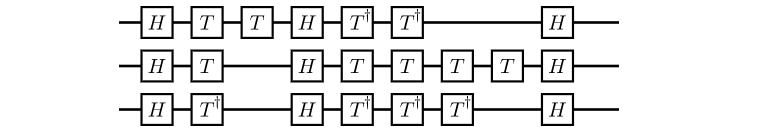

That’s an awful lot of s! Implement this same circuit in PennyLane as a QNode just_enough_ts, but minimize the number of  gates by replacing sequences of them with other gates that have the same effect. Using the gates you learned before, how much can you simplify this circuit?

Then, answer the following questions:

What are the original -count, -depth, and regular depth?
What is the optimal -count?
What are the optimal depth and -depth of the resulting circuit?
Record your answers in the variables provided in the code block below.

Tip. Recall that operations can be applied to different qubits by specifying the desired index in the wires variable.

Notes:
T dagger is a rotation
4 T's is a Z gate
2 T's is an S Gate

In [46]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def too_many_ts():
    """You can implement the original circuit here as well, it may help you with
    testing to ensure that the circuits have the same effect.

    Returns:
        array[float]: The measurement outcome probabilities.
    """

    return qml.probs(wires=[0, 1, 2])

@qml.qnode(dev)
def just_enough_ts():
    """Implement an equivalent circuit as the above with the minimum number of 
    T and T^\dagger gates required.

    Returns:
        array[float]: The measurement outcome probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)

    
    qml.S(wires=0)
    qml.T(wires=1)
    qml.adjoint(qml.T)(wires=2)

    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)
    
    
    qml.adjoint(qml.S)(wires=0)
    qml.PauliZ(wires=1)
    qml.adjoint(qml.S)(wires=2)
    qml.adjoint(qml.T)(wires=2)

    qml.Hadamard(wires = 0)
    qml.Hadamard(wires = 1)
    qml.Hadamard(wires = 2)
    
    # IMPLEMENT THE CIRCUIT, BUT COMBINE AND OPTIMIZE THE GATES
    # TO MINIMIZE THE NUMBER OF TS

    return qml.probs(wires=[0, 1, 2])

##################
# YOUR CODE HERE #
##################

# FILL IN THE CORRECT VALUES FOR THE ORIGINAL CIRCUIT
original_depth = 8
original_t_count = 13
original_t_depth = 6

# FILL IN THE CORRECT VALUES FOR THE NEW, OPTIMIZED CIRCUIT
optimal_depth = 6
optimal_t_count = 3
optimal_t_depth = 2


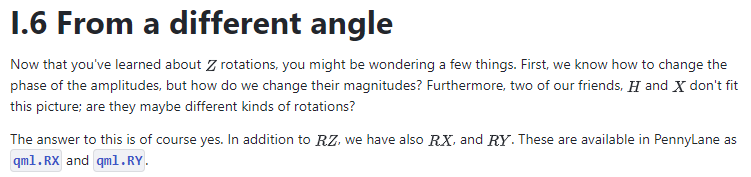
### Codercise I.6.1. 
Write a QNode that applies qml.RX with an angle of  to one of the computational basis states. What operation is this?

In [47]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.
    
    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi, wires = 0)
    return qml.state()

print(apply_rx_pi(0))
print(apply_rx_pi(1))


[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


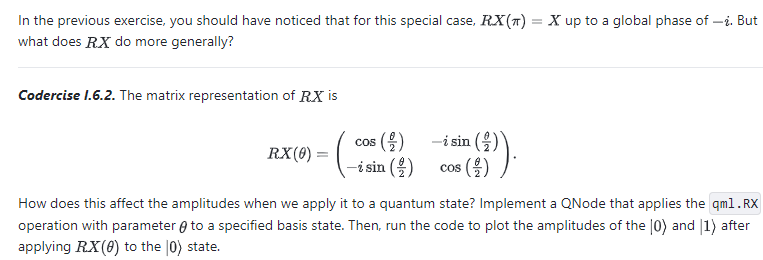

In [48]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(theta, wires = 0)
    return qml.state()


# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plot = plotter(angles, output_states)


NameError: name 'plotter' is not defined

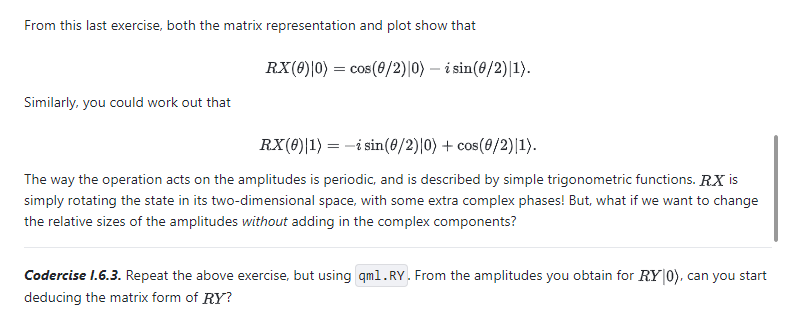

In [49]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.
    
    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.
    
    Returns:
        array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta, wires = 0)

    return qml.state()

# Code for plotting
angles = np.linspace(0, 4*np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plot = plotter(angles, output_states)


NameError: name 'plotter' is not defined

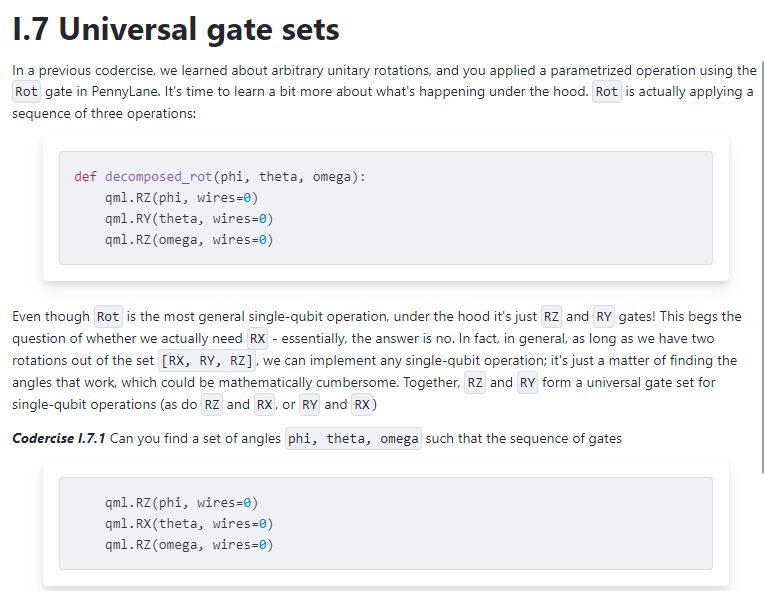

In [50]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2
@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
    return qml.state()


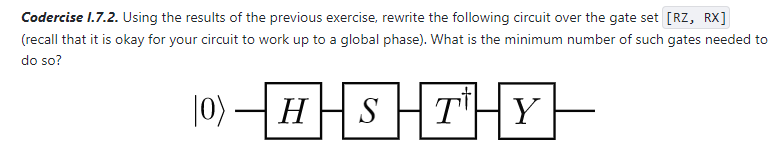

In [51]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    # H
    qml.RZ(np.pi/2, wires=0)
    qml.RX(np.pi/2, wires=0)
    qml.RZ(np.pi/2, wires=0)
    
    # S
    qml.RZ(np.pi/2, wires=0)
    
    # T
    qml.RZ(-np.pi/4, wires=0)
    
    # Y
    qml.RZ(np.pi, wires=0)
    qml.RX(np.pi, wires=0)

    



    return qml.state()


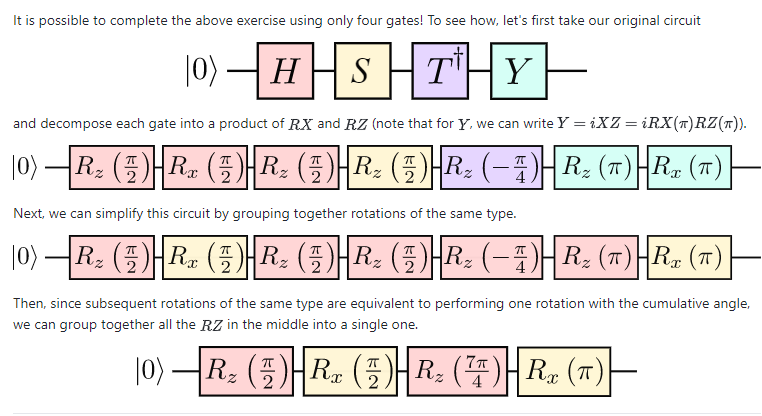
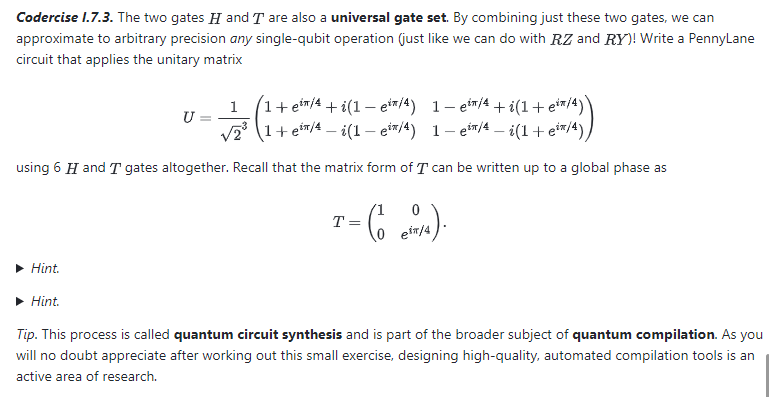

In [52]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################
    
    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)
    qml.T(wires=0)
    qml.T(wires=0)
    qml.Hadamard(wires=0)


    return qml.state()


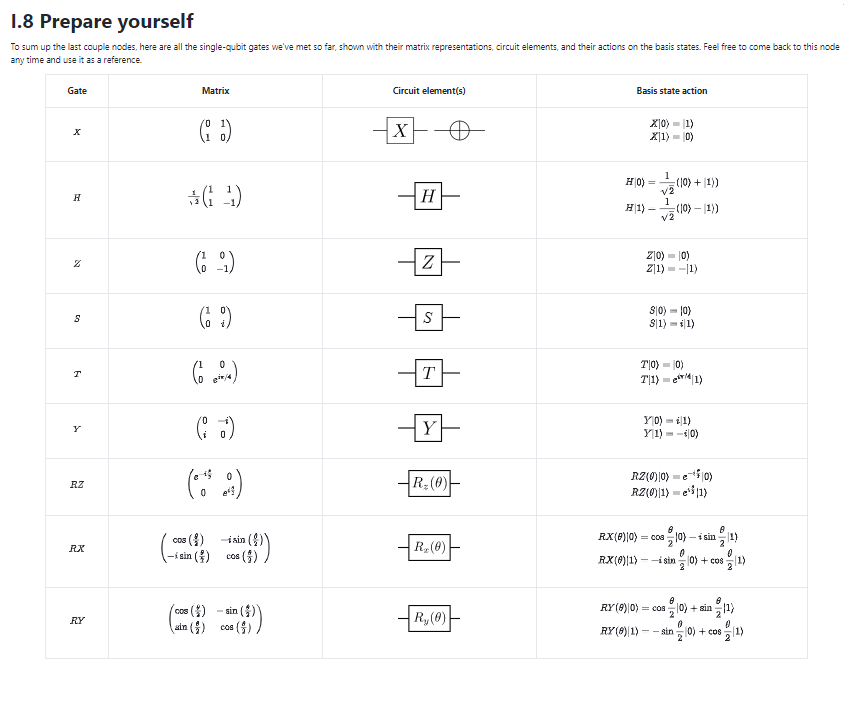

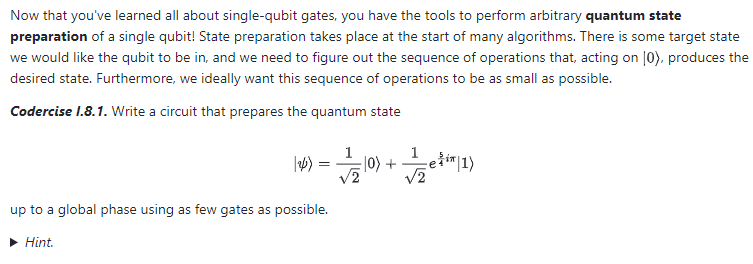

In [53]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.T(wires=0)

    return qml.state()

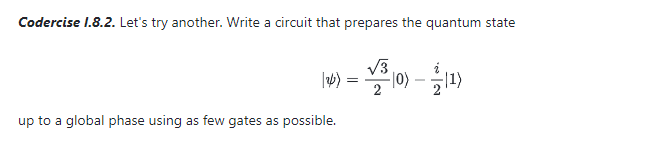

In [54]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi/3, wires=0)
    
    return qml.state()


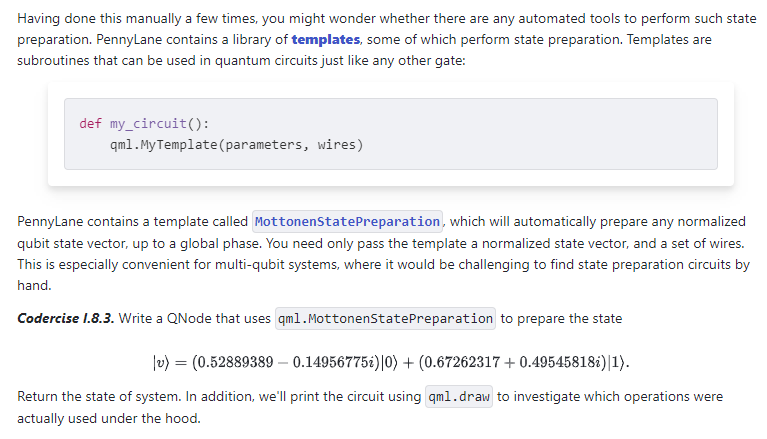

In [55]:
v = np.array([0.52889389-0.14956775j, 0.67262317+0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device('default.qubit', wires=1)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE
@qml.qnode(dev)
def prepare_state(state=v):
    qml.MottonenStatePreparation(v, wires=0)
    return qml.state()

# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print()
print(qml.draw(prepare_state)(v))


[0.49365933-0.24166034j 0.75032489+0.36730546j]

0: ──MottonenStatePreparation(M0)─┤  State


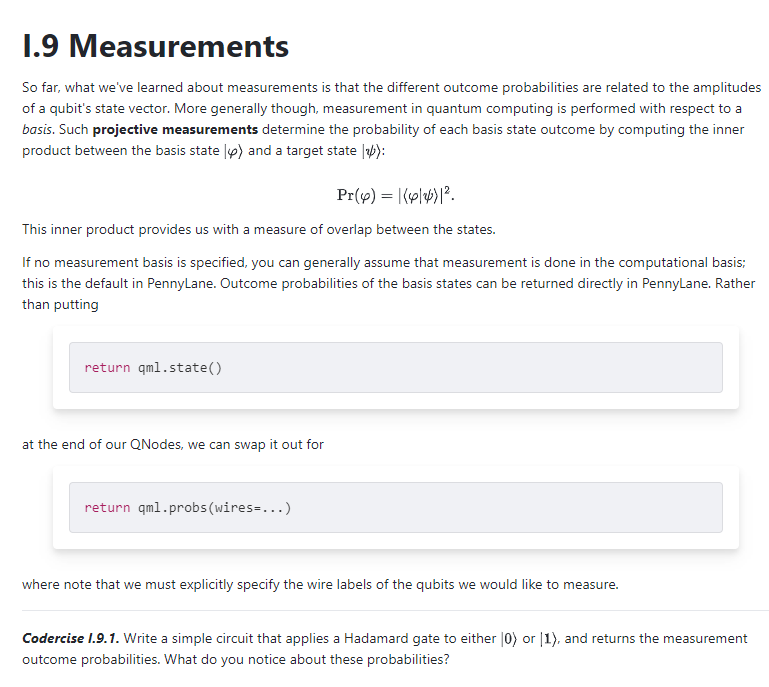

In [56]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.
    
    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.
    
    Returns:
        array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(wires=0)

    return qml.probs(wires=0)

print(apply_h_and_measure(0))
print(apply_h_and_measure(1))


[0.5 0.5]
[0.5 0.5]


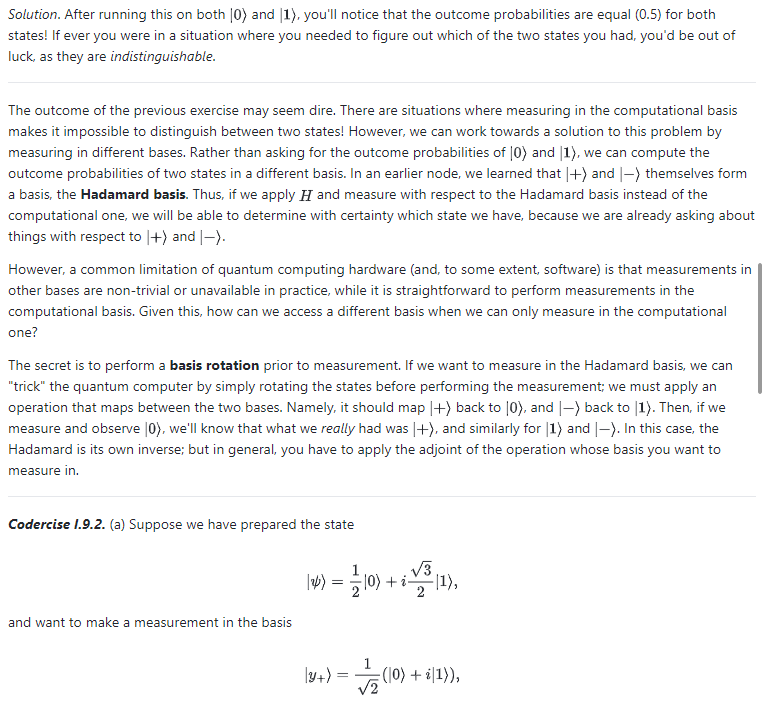

In [57]:
##################
# YOUR CODE HERE #
##################

# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.MottonenStatePreparation(state_vector=np.array([1/2,1j*np.sqrt(3)/2]),wires=range(1))


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires =0)



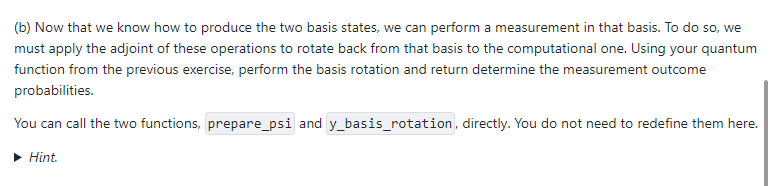

In [58]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################
    
    # PREPARE THE STATE
    prepare_psi()
    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    qml.adjoint(y_basis_rotation)()


    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES

    return qml.probs(wires = 0)

print(measure_in_y_basis())


[0.9330127 0.0669873]


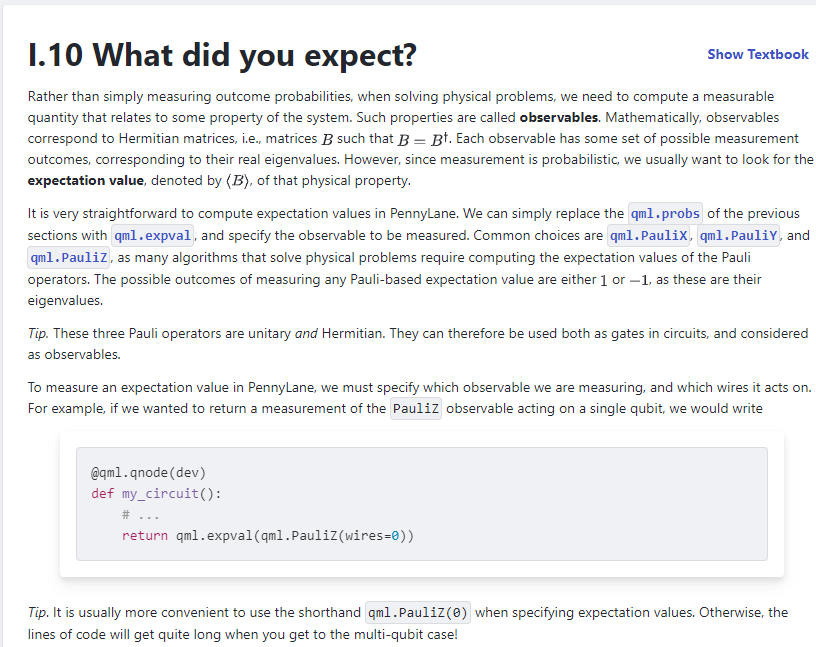
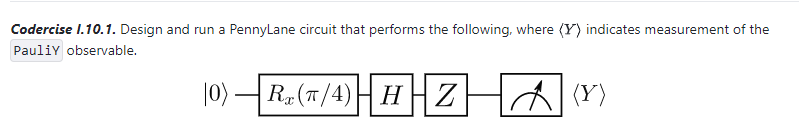

In [59]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4, wires = 0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    
    return qml.expval(qml.PauliY(wires=0))
    
print(circuit())


-0.7071067811865471


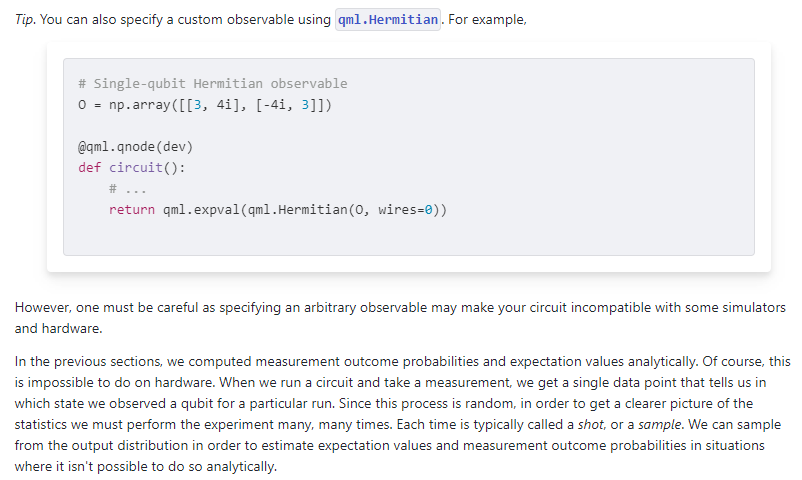
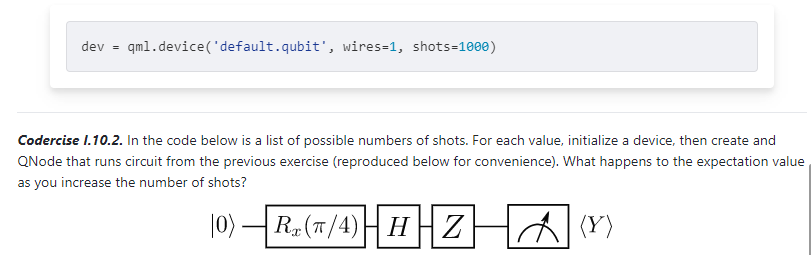

In [60]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values: 
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device('default.qubit', wires=1, shots=shots)
    # STORE RESULT IN SHOT_RESULTS ARRAY
    
    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    @qml.qnode(dev)
    def Circuit():
        qml.RX(np.pi/4, wires = 0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)
        return qml.expval(qml.PauliY(wires=0))
        
    shot_results.append(Circuit())

print(qml.math.unwrap(shot_results))


[-0.6, -0.712, -0.7038, -0.70534, -0.707024]


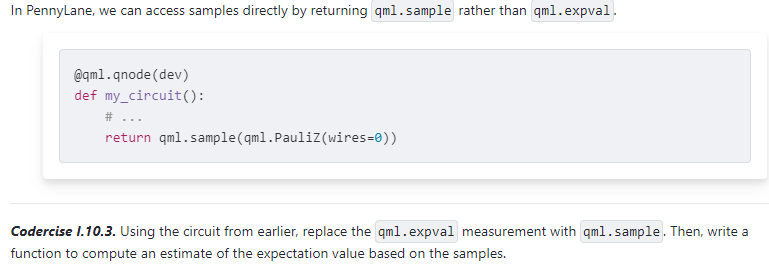

In [61]:
dev = qml.device("default.qubit", wires=1, shots=100000)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.expval(qml.PauliY(wires=0))

def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of 
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1. 
    
    Args: 
        samples (array[float]): 100000 samples representing the results of
            running the above circuit.
        
    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE

    return np.mean(samples)


samples = circuit()
print(compute_expval_from_samples(samples))


-0.7024


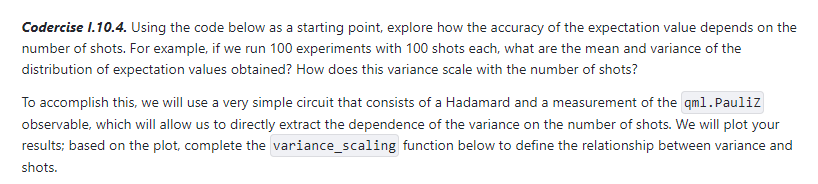

In [62]:
def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.
    
    Args:
        n_shots (int): The number of shots
        
    Returns:
        float: The variance in expectation value we obtain running the 
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires = 1, shots = n_shots)
    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    results = [circuit().numpy() for i in range(n_trials) ]
    return np.var(results)


def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.
    
    Args:
        n_shots (int): The number of shots
        
    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER
   
    return 1/n_shots

# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plot = plotter(shot_vals, results_experiment, results_scaling)


NameError: name 'plotter' is not defined

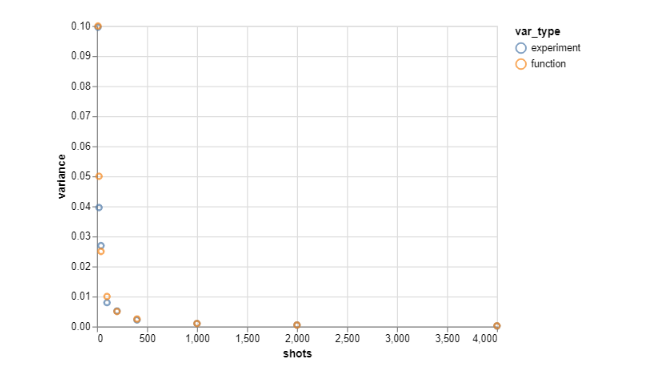

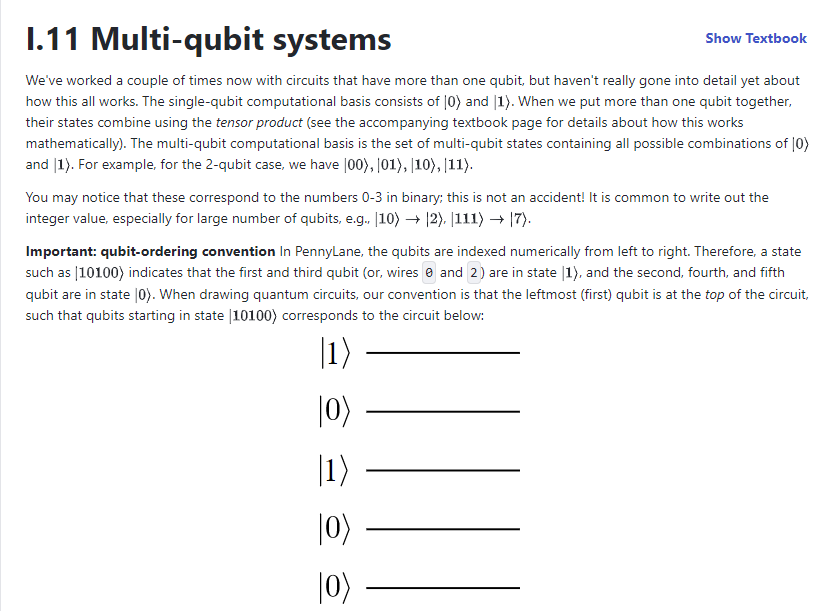
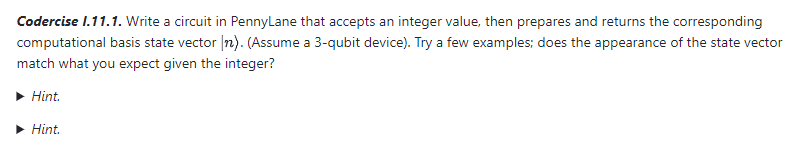

In [63]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def make_basis_state(basis_id):
    """Produce the 3-qubit basis state corresponding to |basis_id>.
    
    Note that the system starts in |000>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.
        
    Returns:
        array[complex]: The computational basis state |basis_id>.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    
    # CREATE THE BASIS STATE
    s = "{0:03b}".format(basis_id)
    
    for i in range(3):
        
        if s[i] == '1':
            qml.PauliX(wires=i)
    
    return qml.state()


basis_id = 3
print(f"Output state = {make_basis_state(basis_id)}")


Output state = [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]


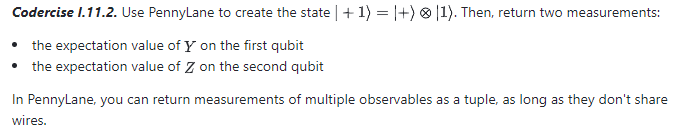


In [64]:
# Creates a device with *two* qubits
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def two_qubit_circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |+>|1>
    qml.Hadamard(wires=0)
    qml.PauliX(wires=1)
    

    # RETURN TWO EXPECTATION VALUES, Y ON FIRST QUBIT, Z ON SECOND QUBIT

    return qml.expval(qml.PauliY(wires=0)), qml.expval(qml.PauliZ(wires=1))


print(two_qubit_circuit())


[ 0. -1.]


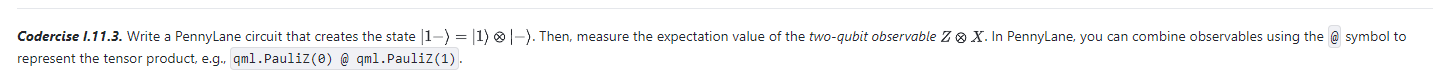

In [65]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def create_one_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE |1>|->
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)

    # RETURN A SINGLE EXPECTATION VALUE Z \otimes X
    qml.Hadamard(wires=1)
    return qml.expval(qml.PauliZ(wires=0) @ qml.PauliX(wires=1))


print(create_one_minus())


0.9999999999999996


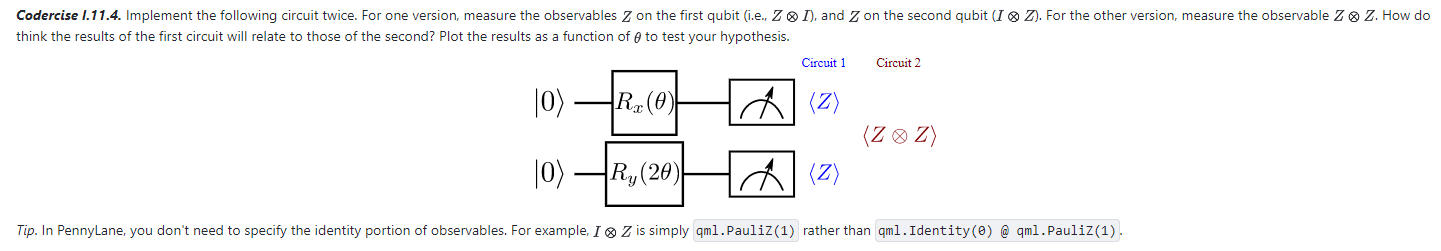

In [66]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def circuit_1(theta):
    """Implement the circuit and measure Z I and I Z.
    
    Args:
        theta (float): a rotation angle.
        
    Returns:
        float, float: The expectation values of the observables Z I, and I Z
    """
    ##################
    # YOUR CODE HERE #
    ##################  
    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)
    return qml.expval(qml.PauliZ(wires=0)), qml.expval(qml.PauliZ(wires =1))


@qml.qnode(dev)
def circuit_2(theta):
    """Implement the circuit and measure Z Z.
    
    Args:
        theta (float): a rotation angle.
        
    Returns:
        float: The expectation value of the observable Z Z
    """ 

    ##################
    # YOUR CODE HERE #
    ##################  
    qml.RX(theta, wires=0)
    qml.RY(2*theta, wires=1)
    return qml.expval(qml.PauliZ(wires=0) @ qml.PauliZ(wires=1))


def zi_iz_combination(ZI_results, IZ_results):
    """Implement a function that acts on the ZI and IZ results to
    produce the ZZ results. How do you think they should combine?

    Args:
        ZI_results (array[float]): Results from the expectation value of 
            ZI in circuit_1.
        IZ_results (array[float]): Results from the expectation value of 
            IZ in circuit_2.

    Returns:
        array[float]: A combination of ZI_results and IZ_results that 
        produces results equivalent to measuring ZZ.
    """

    combined_results = np.zeros(len(ZI_results))

    ##################
    # YOUR CODE HERE #
    ##################  

    return ZI_results *IZ_results

 
theta = np.linspace(0, 2 * np.pi, 100)

# Run circuit 1, and process the results
circuit_1_results = np.array([circuit_1(t) for t in theta])

ZI_results = circuit_1_results[:, 0]
IZ_results = circuit_1_results[:, 1]
combined_results = zi_iz_combination(ZI_results, IZ_results)

# Run circuit 2
ZZ_results = np.array([circuit_2(t) for t in theta])

# Plot your results
plot = plotter(theta, ZI_results, IZ_results, ZZ_results, combined_results)


NameError: name 'plotter' is not defined

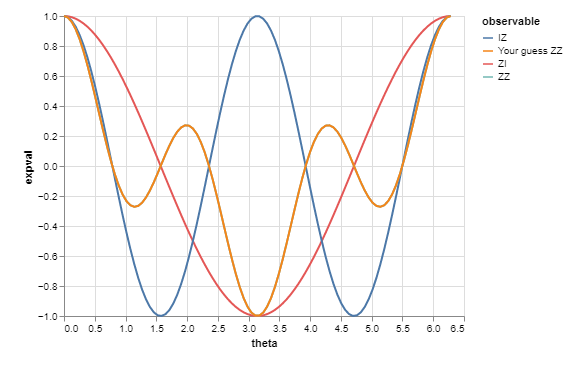

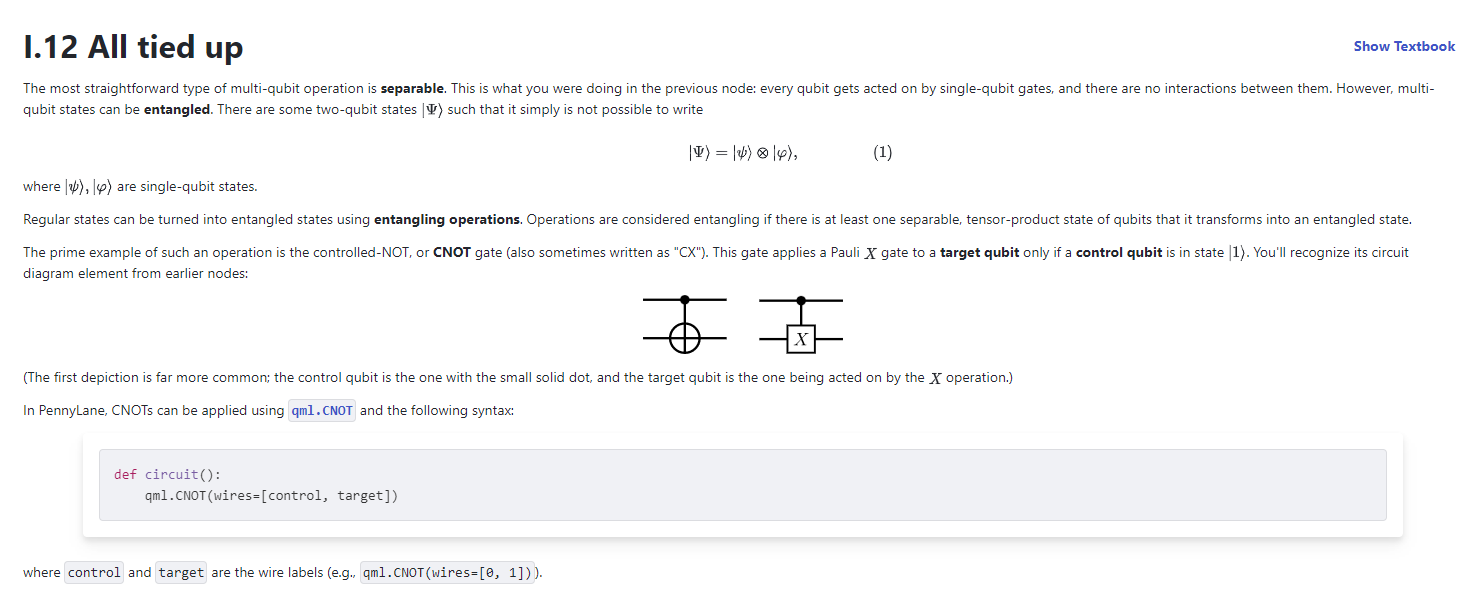

In [67]:
dev = qml.device('default.qubit', wires=2)

@qml.qnode(dev)
def apply_cnot(basis_id):
    """Apply a CNOT to |basis_id>.

    Args:
        basis_id (int): An integer value identifying the basis state to construct.
      
    Returns:
        array[complex]: The resulting state after applying CNOT|basis_id>.
    """

    # Prepare the basis state |basis_id>
    bits = [int(x) for x in np.binary_repr(basis_id, width=dev.num_wires)]
    qml.BasisStatePreparation(bits, wires=[0, 1])

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE CNOT
    qml.CNOT(wires=[0,1])
    return qml.state()


##################
# YOUR CODE HERE #
##################

# REPLACE THE BIT STRINGS VALUES BELOW WITH THE CORRECT ONES
cnot_truth_table = {
    "00" : "00",
    "01" : "01",
    "10" : "11",
    "11" : "10"
}


# Run your QNode with various inputs to help fill in your truth table
print(apply_cnot(0))
print(apply_cnot(1))
print(apply_cnot(2))
print(apply_cnot(3))


[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
[0.+0.j 0.+0.j 1.+0.j 0.+0.j]


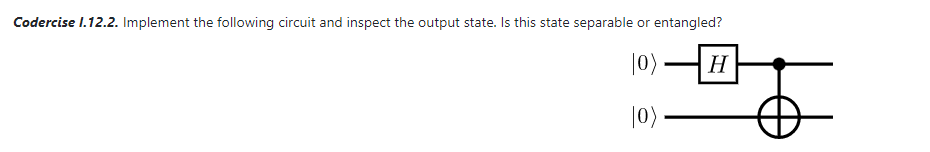

In [68]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def apply_h_cnot():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE OPERATIONS IN THE CIRCUIT
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])

    return qml.state()


print(apply_h_cnot())

##################
# YOUR CODE HERE #
##################

# SET THIS AS 'separable' OR 'entangled' BASED ON YOUR OUTCOME
state_status = "entangled"


[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


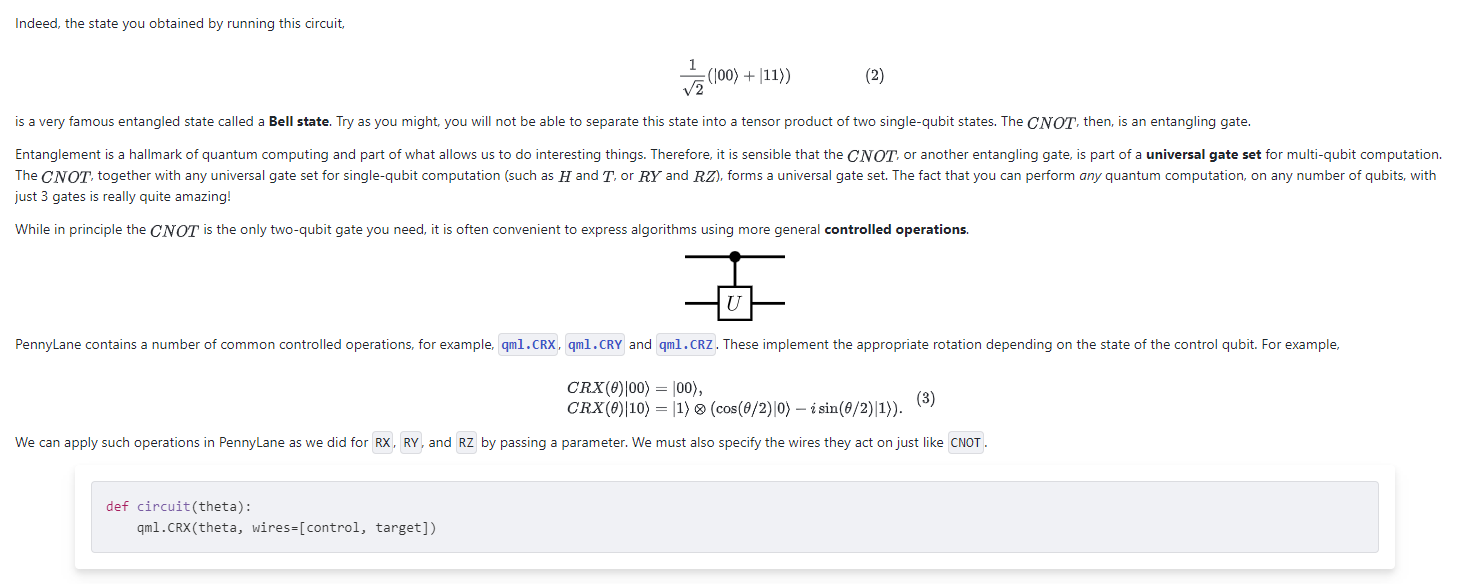

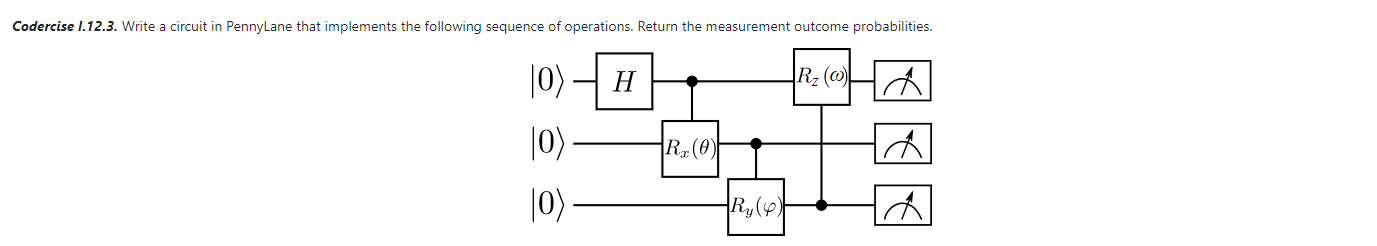

In [69]:
dev = qml.device('default.qubit', wires=3)

@qml.qnode(dev)
def controlled_rotations(theta, phi, omega):
    qml.Hadamard(wires=0)
    qml.CRX(theta, wires=[0,1])
    qml.CRY(phi, wires=[1,2])
    qml.CRZ(omega, wires=[2,0])
    return qml.probs([0,1,2])

theta, phi, omega = 0.1, 0.2, 0.3
print(controlled_rotations(theta, phi, omega))


[5.00000000e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.98751041e-01 0.00000000e+00 1.23651067e-03 1.24480103e-05]


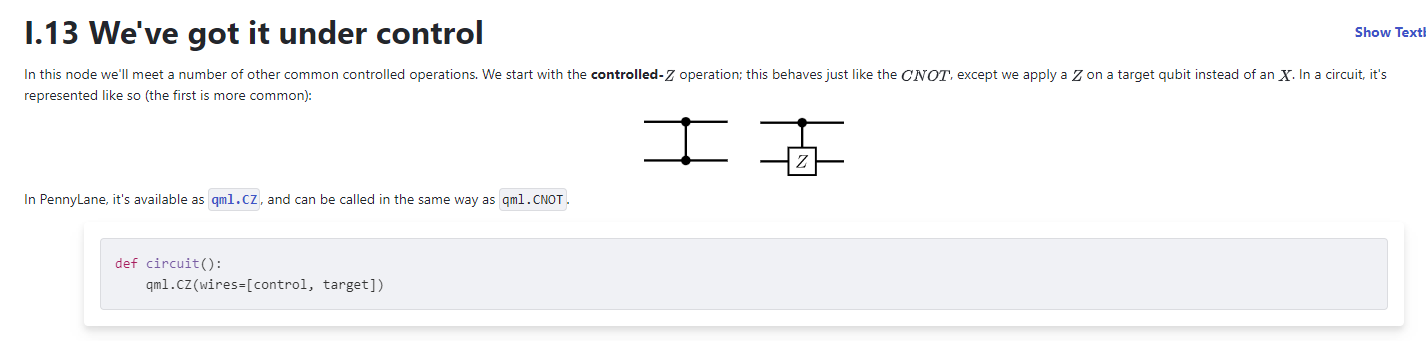
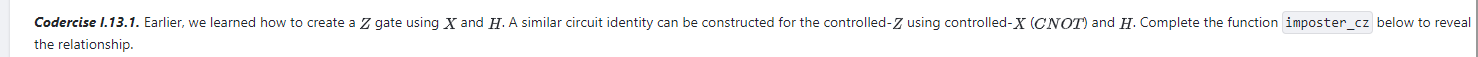

In [70]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(device=dev)
def true_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR CZ GATE HERE
    qml.CZ(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def imposter_cz(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT CZ USING ONLY H AND CNOT
    qml.Hadamard(wires=1)
    qml.CNOT(wires = [0,1])
    qml.Hadamard(wires=1)
    
    return qml.state()


print(f"True CZ output state {true_cz(phi, theta, omega)}")
print(f"Imposter CZ output state {imposter_cz(phi, theta, omega)}")


NameError: name 'prepare_states' is not defined

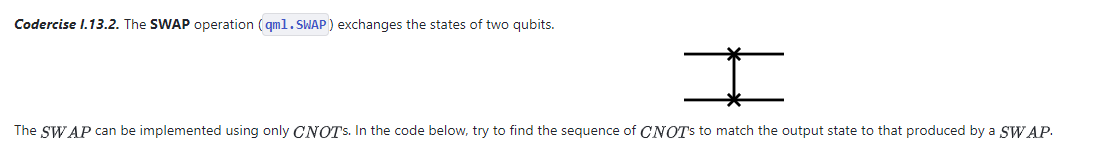

In [71]:
dev = qml.device("default.qubit", wires=2)

# Prepare a two-qubit state; change up the angles if you like
phi, theta, omega = 1.2, 2.3, 3.4


@qml.qnode(dev)
def apply_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE REGULAR SWAP GATE HERE
    qml.SWAP(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def apply_swap_with_cnots(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE SWAP GATE USING A SEQUENCE OF CNOTS
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[0,1])

    return qml.state()


print(f"Regular SWAP state = {apply_swap(phi, theta, omega)}")
print(f"CNOT SWAP state = {apply_swap_with_cnots(phi, theta, omega)}")


NameError: name 'prepare_states' is not defined

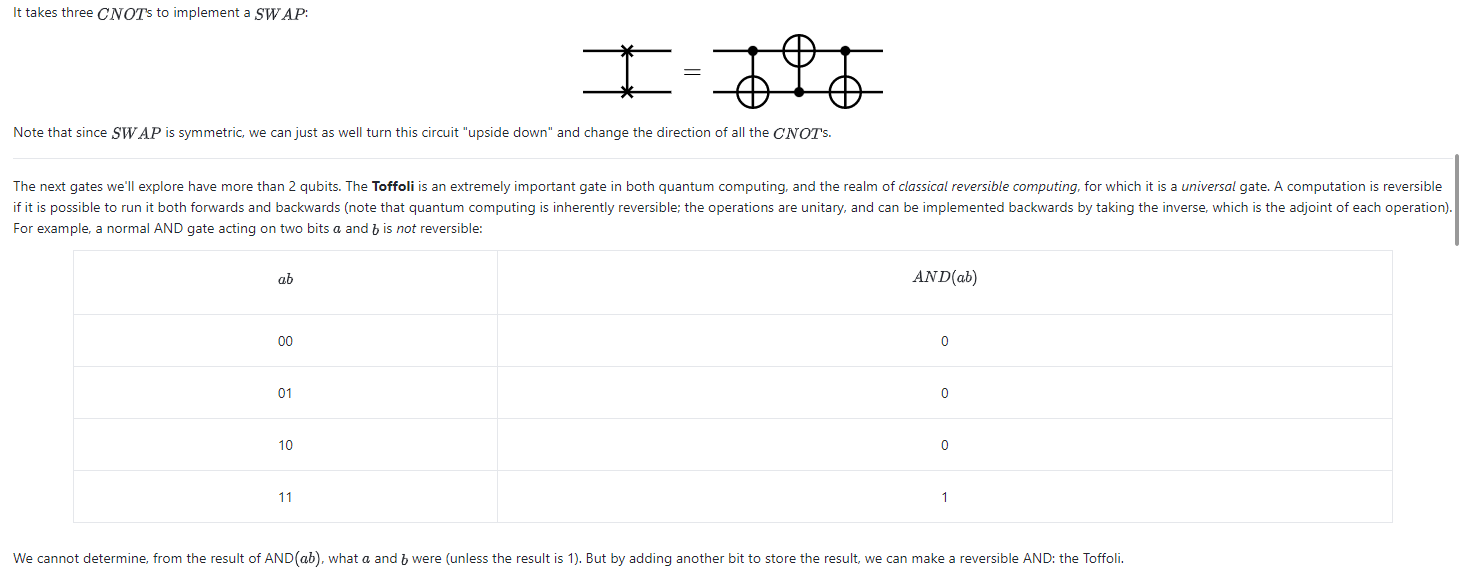
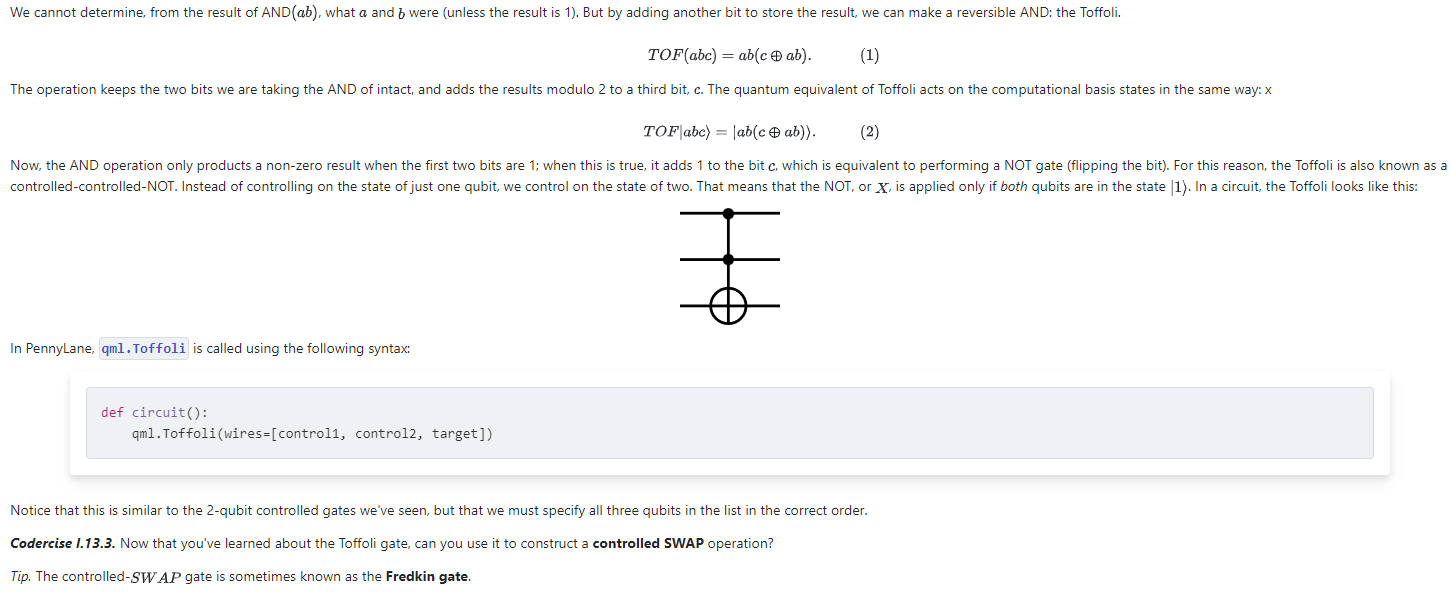

In [72]:
dev = qml.device("default.qubit", wires=3)

# Prepare first qubit in |1>, and arbitrary states on the second two qubits
phi, theta, omega = 1.2, 2.3, 3.4


# A helper function just so you can visualize the initial state
# before the controlled SWAP occurs.
@qml.qnode(dev)
def no_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    return qml.state()


@qml.qnode(dev)
def controlled_swap(phi, theta, omega):
    prepare_states(phi, theta, omega)
    
    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM A CONTROLLED SWAP USING A SEQUENCE OF TOFFOLIS
    qml.Toffoli(wires=[0, 1, 2])
    qml.Toffoli(wires=[0, 2, 1])
    qml.Toffoli(wires=[0, 1, 2])

    return qml.state()


print(no_swap(phi, theta, omega))
print(controlled_swap(phi, theta, omega))


NameError: name 'prepare_states' is not defined

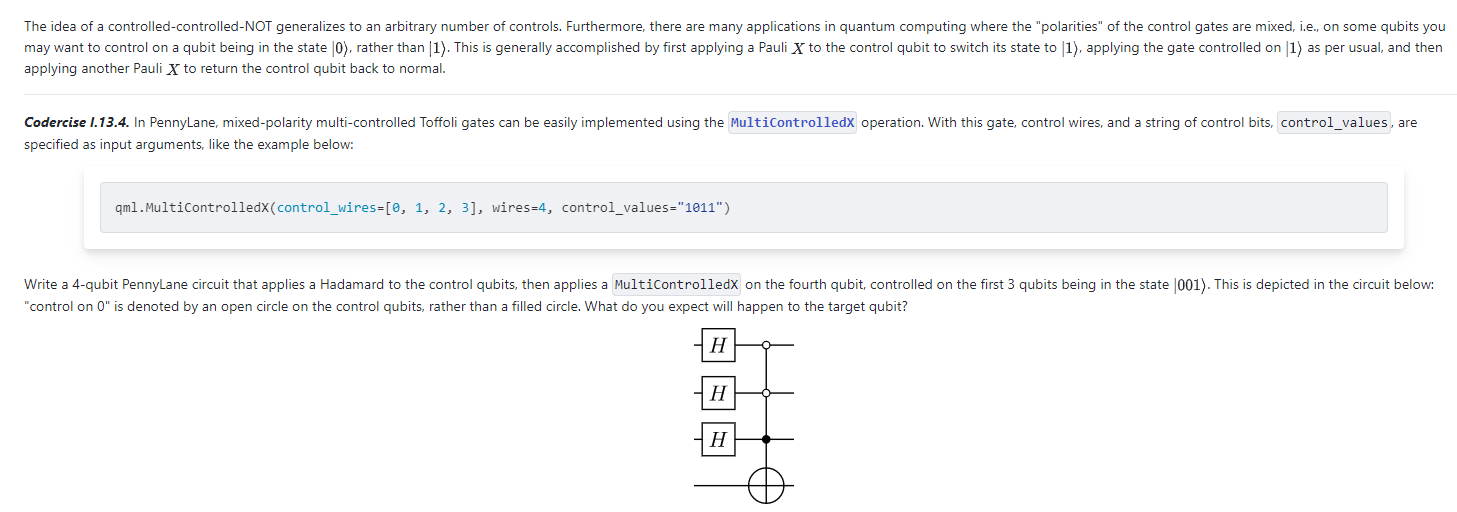

In [73]:
dev = qml.device('default.qubit', wires=4)

@qml.qnode(dev)
def four_qubit_mcx():
    ##################
    # YOUR CODE HERE #
    ##################
    
    # IMPLEMENT THE CIRCUIT ABOVE USING A 4-QUBIT MULTI-CONTROLLED X
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)

    qml.MultiControlledX(control_wires=[0, 1, 2], wires=3, control_values="001")
    return qml.state()


print(four_qubit_mcx())


[0.35355339+0.j 0.        +0.j 0.        +0.j 0.35355339+0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j
 0.35355339+0.j 0.        +0.j 0.35355339+0.j 0.        +0.j]


/opt/conda/lib/python3.9/site-packages/pennylane/ops/qubit/non_parametric_ops.py:2025: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


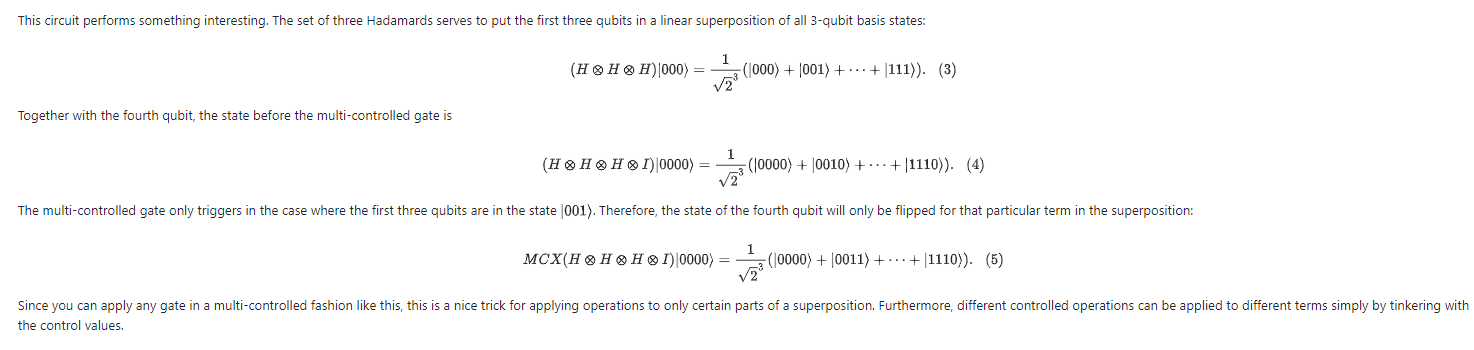
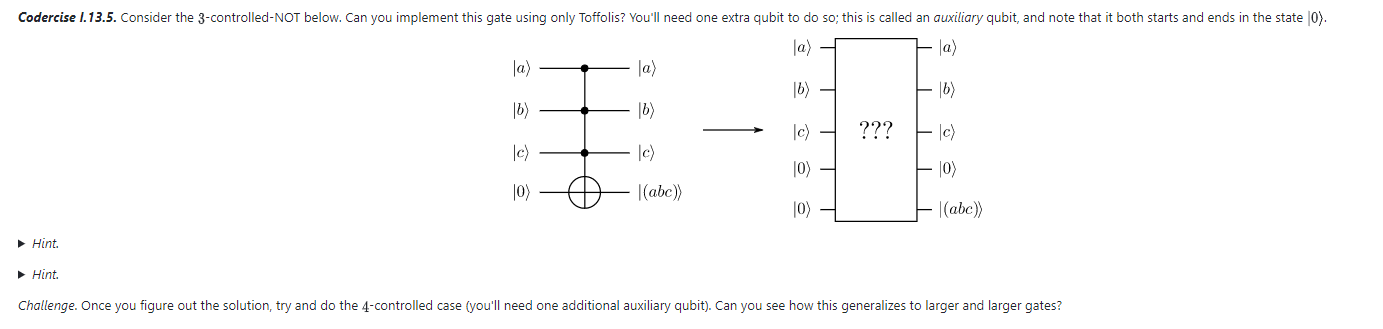

In [74]:
# Wires 0, 1, 2 are the control qubits
# Wire 3 is the auxiliary qubit
# Wire 4 is the target 
dev = qml.device('default.qubit', wires=5)


@qml.qnode(dev)
def four_qubit_mcx_only_tofs():
    # We will initialize the control qubits in state |1> so you can see
    # how the output state gets changed.
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    qml.PauliX(wires=2)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Toffoli(wires=[0,1,3])
    qml.Toffoli(wires=[2,3,4])
    qml.Toffoli(wires=[0,1,3])

    return qml.state()


print(four_qubit_mcx_only_tofs())


[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
 0.+0.j 0.+0.j]


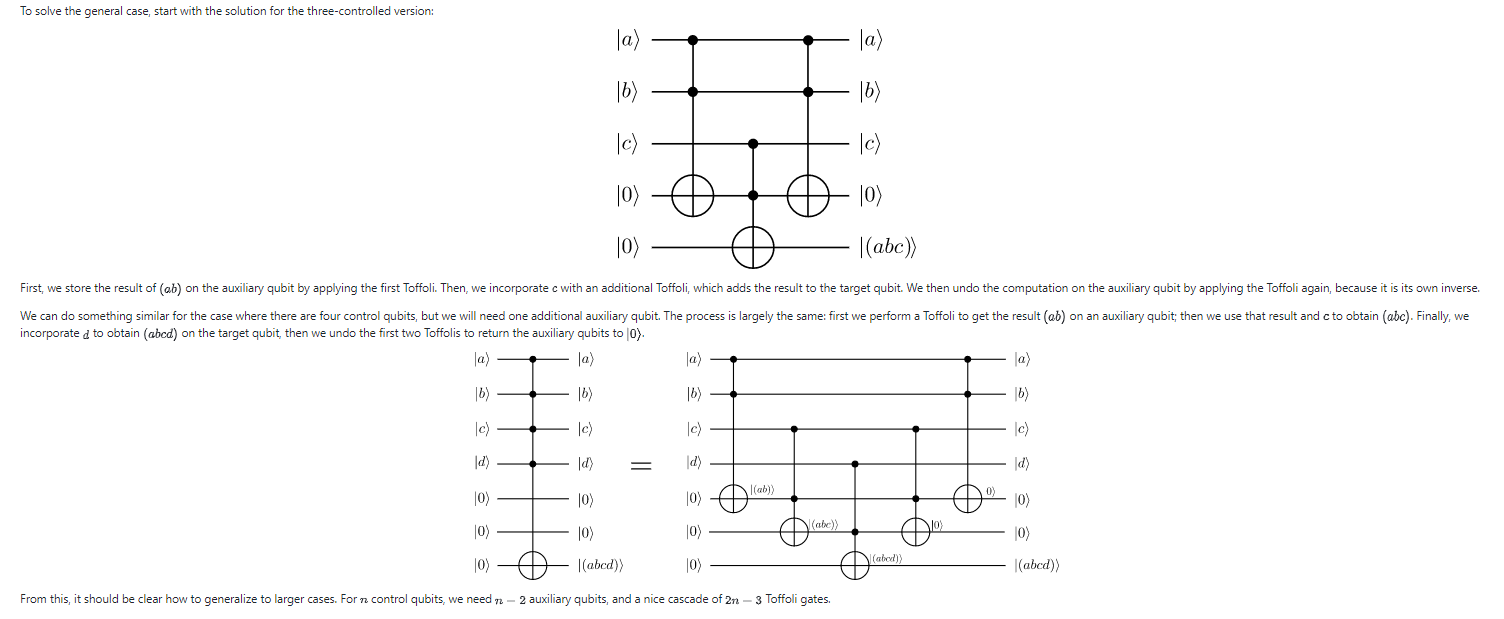

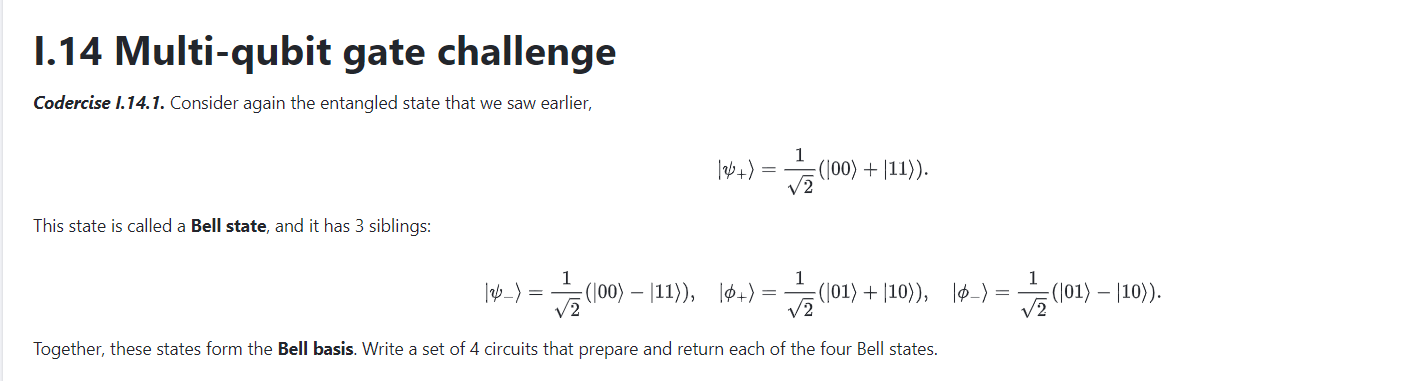

In [75]:
dev = qml.device('default.qubit', wires=2)

# Starting from the state |00>, implement a PennyLane circuit
# to construct each of the Bell basis states.

@qml.qnode(dev)
def prepare_psi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> + |11>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.state()


@qml.qnode(dev)
def prepare_psi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE (1/sqrt(2)) (|00> - |11>)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)
    qml.CNOT(wires=[0,1])

    return qml.state()


@qml.qnode(dev)
def prepare_phi_plus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> + |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.PauliX(wires=0)

    return qml.state()


@qml.qnode(dev)
def prepare_phi_minus():
    ##################
    # YOUR CODE HERE #
    ##################

    # PREPARE  (1/sqrt(2)) (|01> - |10>)
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.PauliX(wires=0)    
    qml.PauliZ(wires=0)

    return qml.state()


psi_plus = prepare_psi_plus()
psi_minus = prepare_psi_minus()
phi_plus = prepare_phi_plus()
phi_minus = prepare_phi_minus()

# Uncomment to print results
print(f"|ψ_+> = {psi_plus}")
print(f"|ψ_-> = {psi_minus}")
print(f"|ϕ_+> = {phi_plus}")
print(f"|ϕ_-> = {phi_minus}")


|ψ_+> = [0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
|ψ_-> = [ 0.70710678+0.j  0.        +0.j -0.        +0.j -0.70710678+0.j]
|ϕ_+> = [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j]
|ϕ_-> = [ 0.        +0.j  0.70710678+0.j -0.70710678+0.j -0.        +0.j]


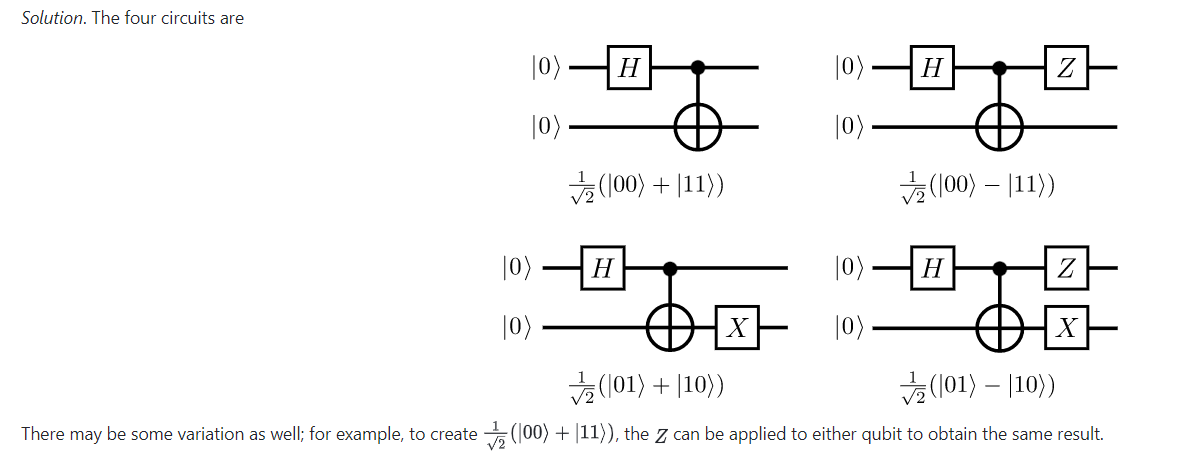

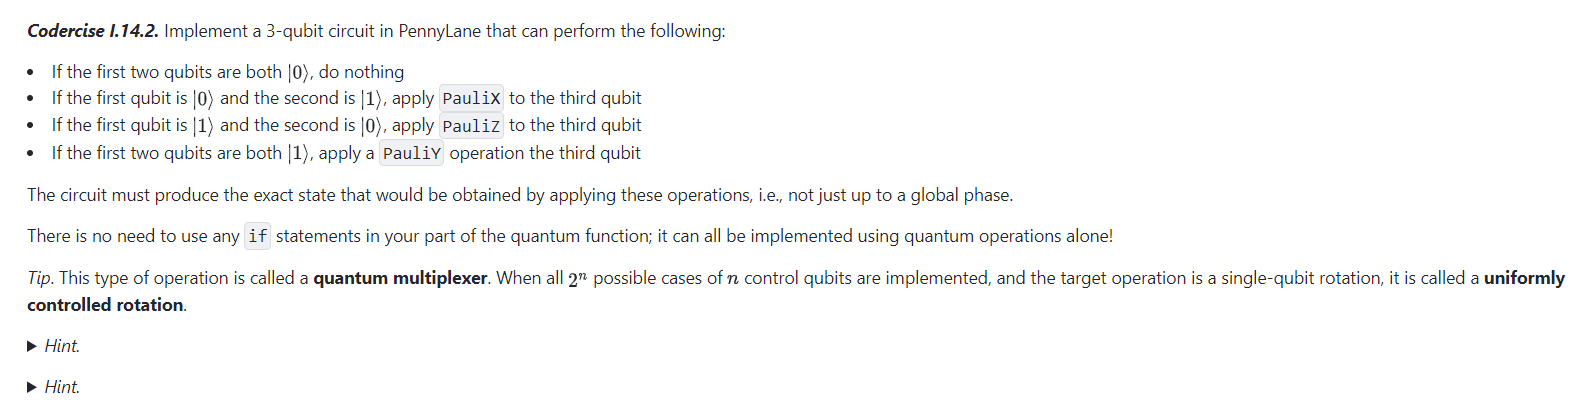

In [76]:
dev = qml.device("default.qubit", wires=3)

# State of first 2 qubits
state = [0, 1]

@qml.qnode(device=dev)
def apply_control_sequence(state):
    # Set up initial state of the first two qubits
    if state[0] == 1:
        qml.PauliX(wires=0)
    if state[1] == 1:
        qml.PauliX(wires=1) 

    # Set up initial state of the third qubit - use |->
    # so we can see the effect on the output
    qml.PauliX(wires=2)
    qml.Hadamard(wires=2)
    
    ##################
    # YOUR CODE HERE #
    ##################
    
    # IMPLEMENT THE MULTIPLEXER
    # IF STATE OF FIRST TWO QUBITS IS 01, APPLY X TO THIRD QUBIT
    qml.PauliX(wires=0)
    qml.Toffoli(wires=[0,1,2])
    qml.PauliX(wires=0)

    # IF STATE OF FIRST TWO QUBITS IS 10, APPLY Z TO THIRD QUBIT
    qml.PauliX(wires=1)
    qml.Hadamard(wires=2)
    qml.Toffoli(wires=[0,1,2])
    qml.Hadamard(wires=2)
    qml.PauliX(wires=1)

    # IF STATE OF FIRST TWO QUBITS IS 11, APPLY Y TO THIRD QUBIT
    qml.Hadamard(wires=2)
    qml.S(wires =2)
    qml.Toffoli(wires=[0,1,2])
    qml.adjoint(qml.S)(wires=2)
    qml.Hadamard(wires=2)

    return qml.state()
    

print(apply_control_sequence(state))


[ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j
  0.        +0.j  0.        +0.j  0.        +0.j  0.        +0.j]


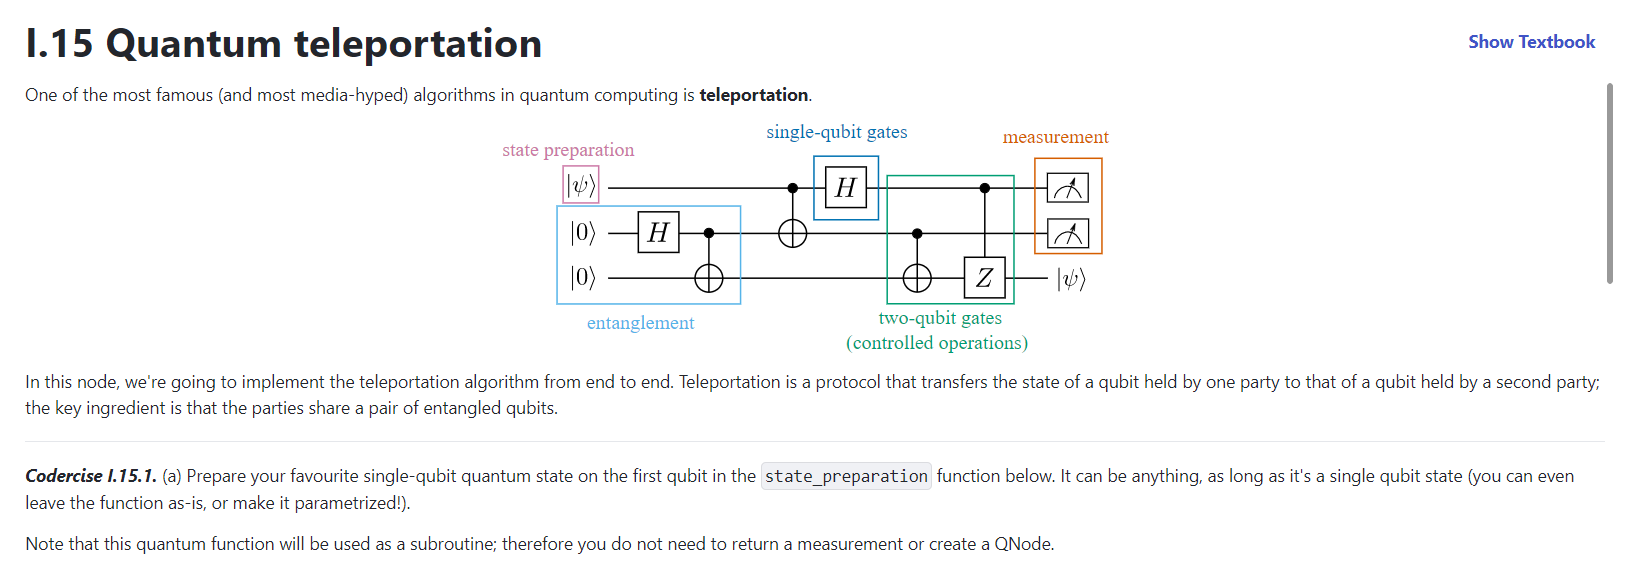

In [77]:
def state_preparation():
    ##################
    # YOUR CODE HERE #
    ##################

    # OPTIONALLY UPDATE THIS STATE PREPARATION ROUTINE

    qml.Hadamard(wires=0)
    qml.Rot(0.1, 0.2, 0.3, wires=0)


In [78]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# OPTIONALLY REPLACE THIS STATE PREPARATION ROUTINE WITH
# THE ONE FROM THE PREVIOUS EXERCISE

def state_preparation():
    qml.Hadamard(wires=0)
    qml.Rot(0.1, 0.2, 0.3, wires=0)


@qml.qnode(dev)
def state_prep_only():
    state_preparation()
    return qml.state()

print(state_prep_only())


[0.61930934-0.13273109j 0.75978977+0.14682614j]


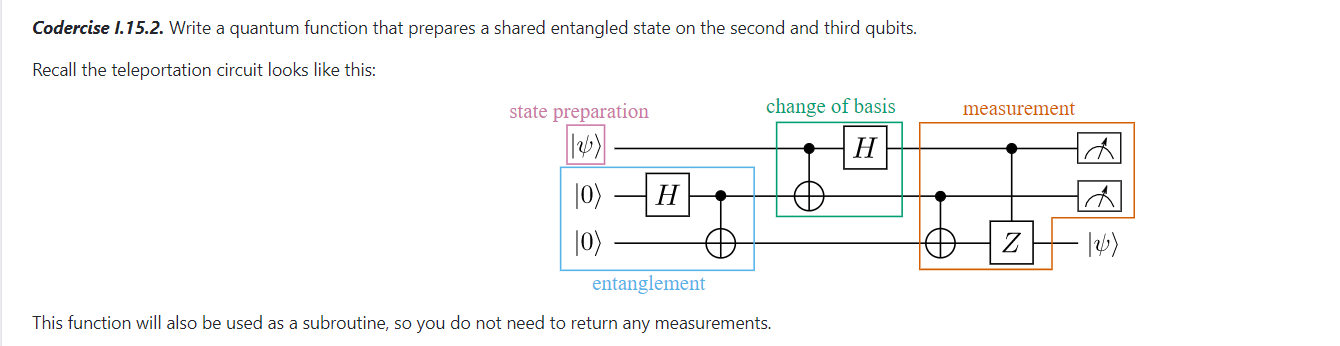

In [79]:
def entangle_qubits():
    ##################
    # YOUR CODE HERE #
    ##################

    # ENTANGLE THE SECOND QUBIT (WIRES=1) AND THE THIRD QUBIT
    qml.Hadamard(wires=1)
    qml.CNOT(wires=[1,2])
    


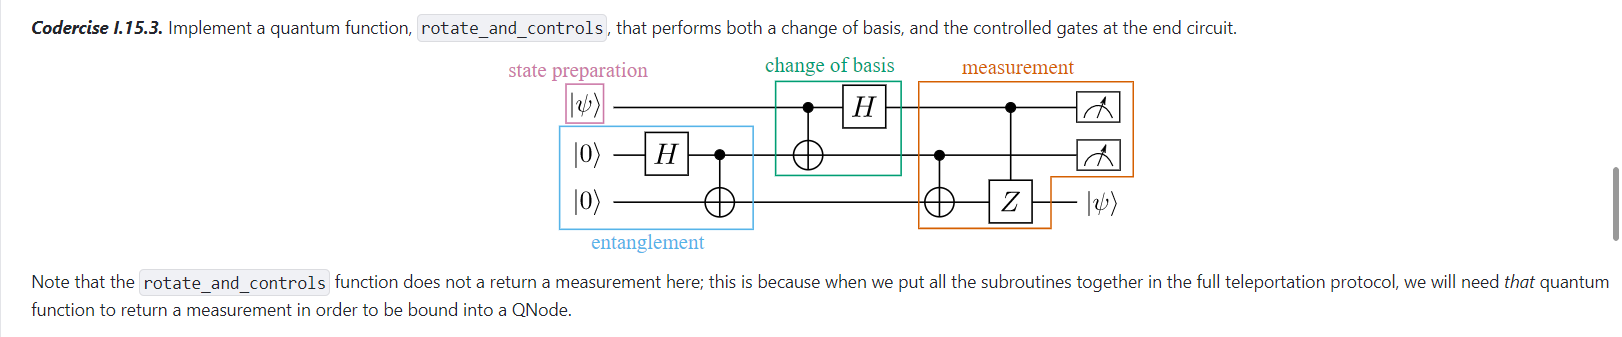

In [80]:
def rotate_and_controls():
    ##################
    # YOUR CODE HERE #
    ##################

    # PERFORM THE BASIS ROTATION
    qml.CNOT(wires=[0,1])
    qml.Hadamard(wires=0)
    # PERFORM THE CONTROLLED OPERATIONS

    qml.CNOT(wires=[1,2])
    qml.CZ(wires=[0,1])


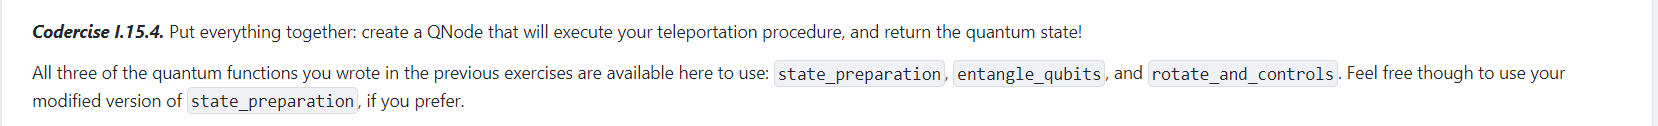

In [81]:
dev = qml.device("default.qubit", wires=3)

##################
# YOUR CODE HERE #
##################

# OPTIONALLY UPDATE THIS STATE PREPARATION ROUTINE
def state_preparation():
    qml.Hadamard(wires=0)
    qml.Rot(0.1, 0.2, 0.3, wires=0)


@qml.qnode(dev)
def teleportation():
    ##################
    # YOUR CODE HERE #
    ##################

    # USE YOUR QUANTUM FUNCTIONS TO IMPLEMENT QUANTUM TELEPORTATION
    state_preparation()
    entangle_qubits()
    rotate_and_controls()
    # RETURN THE STATE
    return qml.state()

print(teleportation())


[ 0.30965467-0.06636554j  0.37989488+0.07341307j  0.30965467-0.06636554j
  0.37989488+0.07341307j  0.30965467-0.06636554j -0.37989488-0.07341307j
 -0.30965467+0.06636554j  0.37989488+0.07341307j]


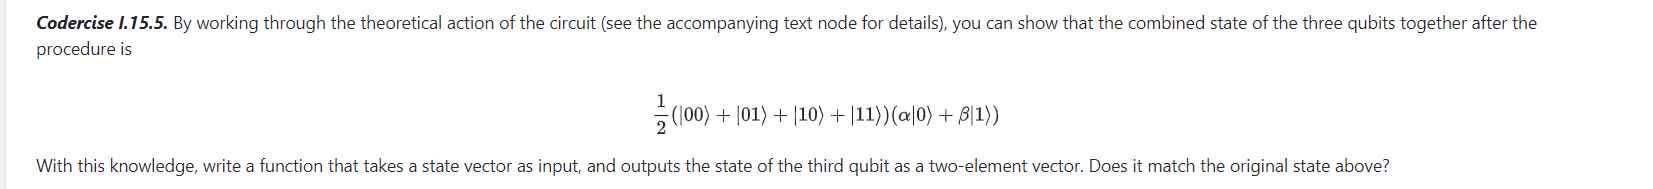

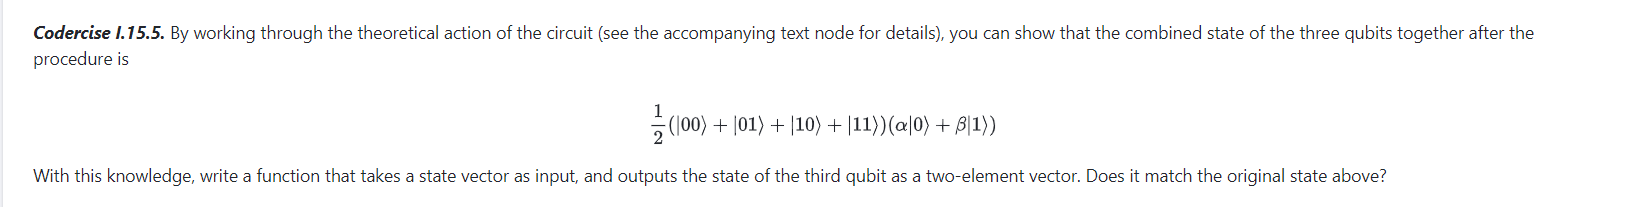

In [82]:
def extract_qubit_state(input_state):
    """Extract the state of the third qubit from the combined state after teleportation.
    
    Args:
        input_state (array[complex]): A 3-qubit state of the form 
            (1/2)(|00> + |01> + |10> + |11>) (a|0> + b|1>)
            obtained from the teleportation protocol.
            
    Returns:
        array[complex]: The state vector np.array([a, b]) of the third qubit.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # DETERMINE THE STATE OF THE THIRD QUBIT
    
    return np.array([2*input_state[0], 2* input_state[1]])
    

# Here is the teleportation routine for you
dev = qml.device("default.qubit", wires=3)

#################
# YOUR CODE HERE #
##################

# OPTIONALLY UPDATE THIS STATE PREPARATION ROUTINE
def state_preparation():
    qml.Hadamard(wires=0)
    qml.Rot(0.1, 0.2, 0.3, wires=0)


@qml.qnode(dev)
def teleportation():
    state_preparation()
    entangle_qubits()
    rotate_and_controls()    
    return qml.state()

# Print the extracted state after teleportation
full_state = teleportation()
print(extract_qubit_state(full_state))


[0.61930934-0.13273109j 0.75978977+0.14682614j]


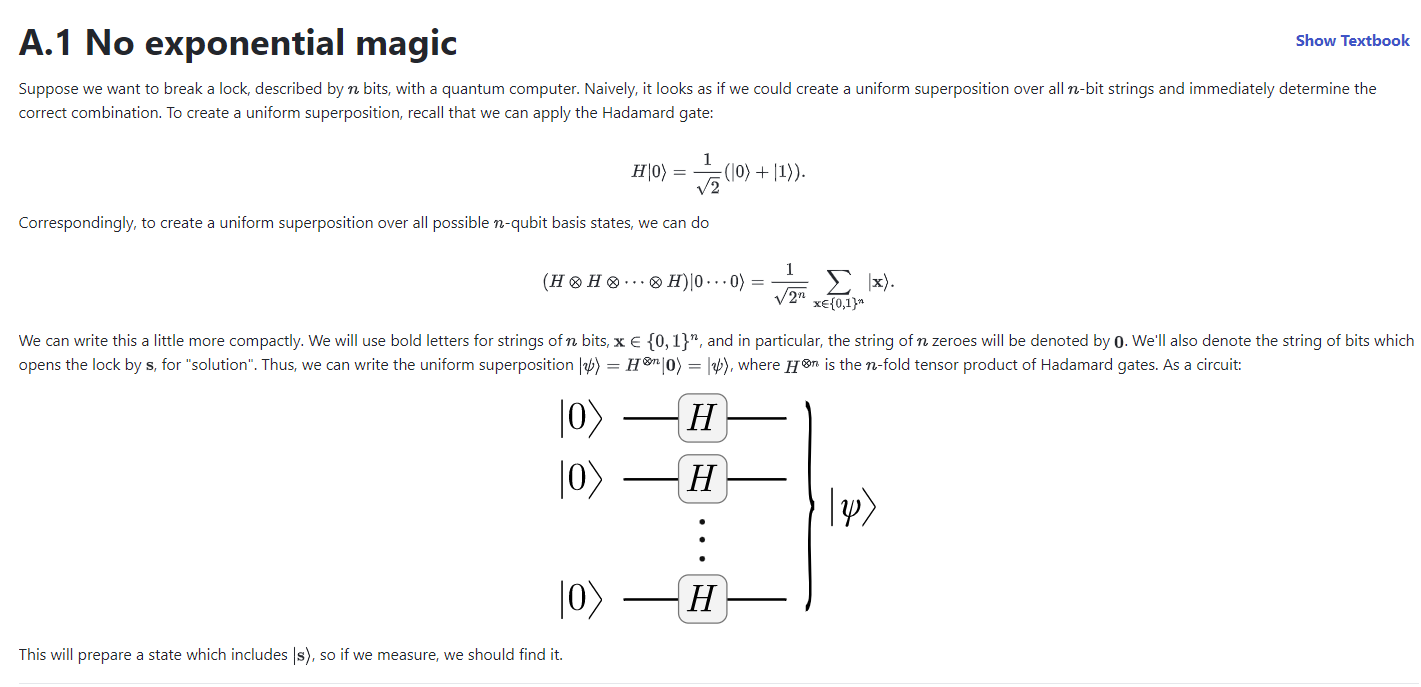
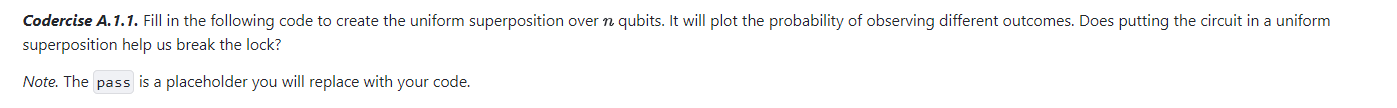

In [83]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def naive_circuit():
    for wire in range(n_bits):
        qml.Hadamard(wires=wire)

    return qml.probs(wires=range(n_bits))


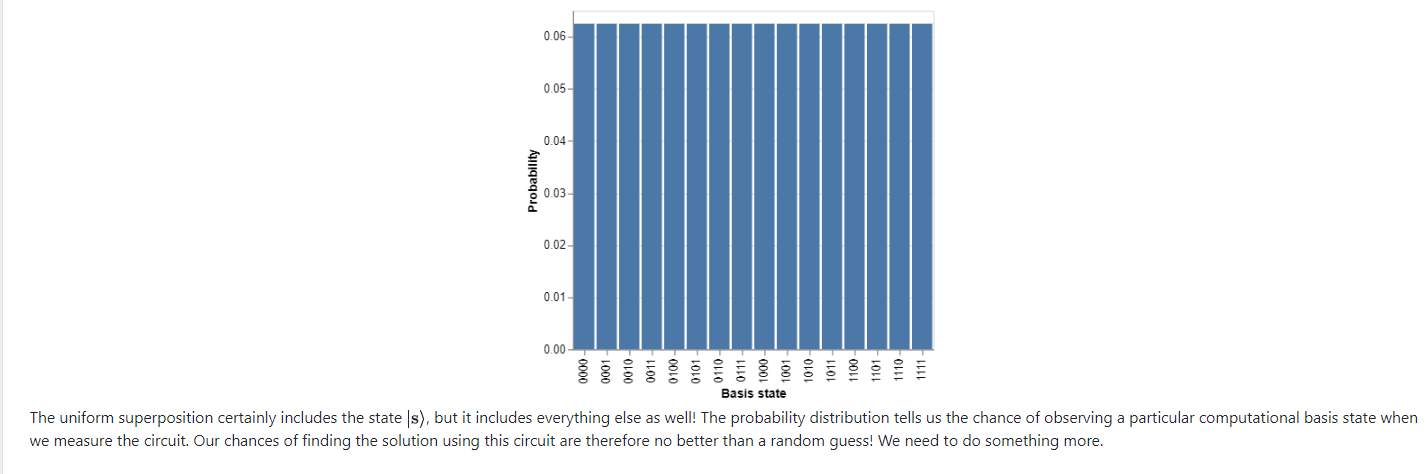

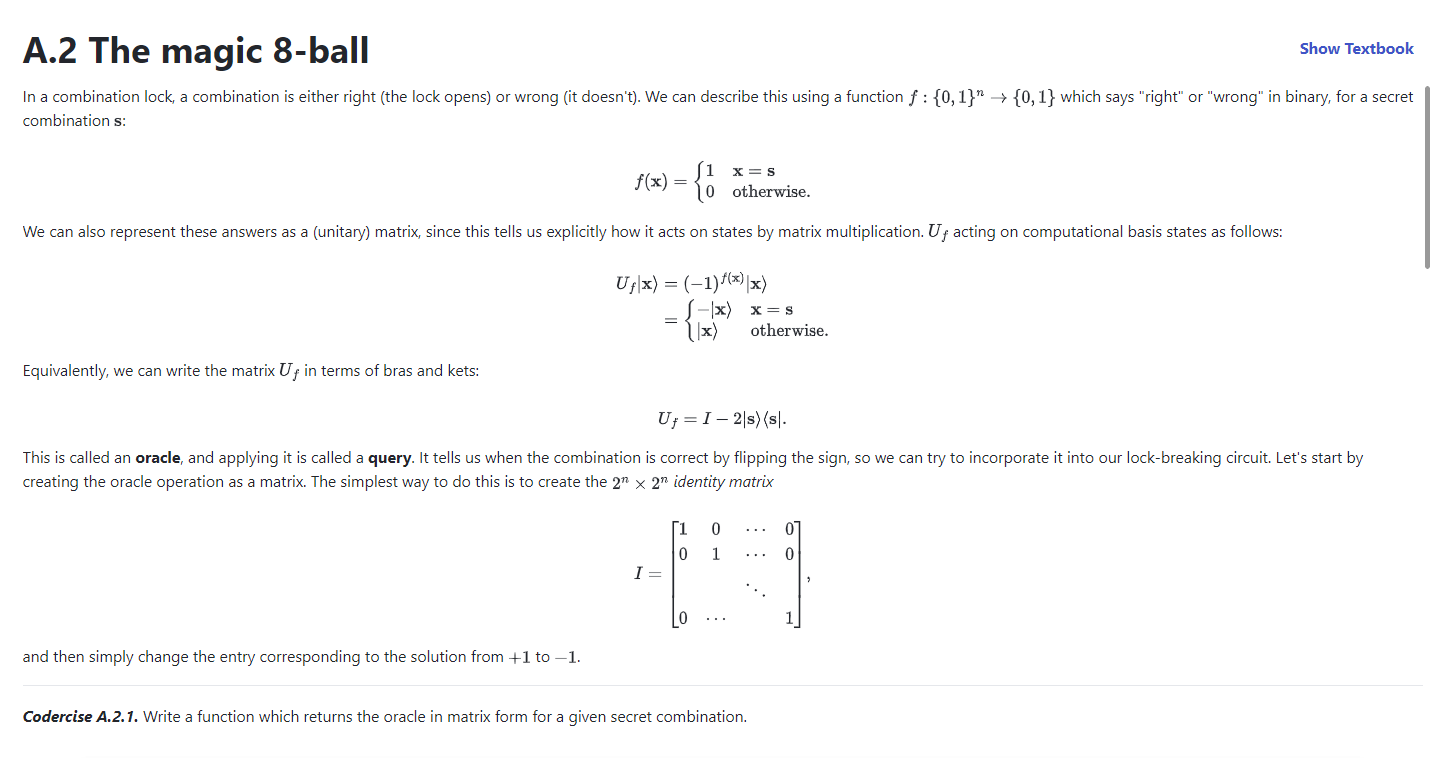

In [84]:
def oracle_matrix(combo):
    """Return the oracle matrix for a secret combination.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.
         
    Returns: 
        array[float]: The matrix representation of the oracle.
    """
    index = np.ravel_multi_index(combo, [2]*len(combo)) # Index of solution
    my_array = np.identity(2**len(combo)) # Create the identity matrix

    ##################
    # YOUR CODE HERE #
    ##################

    # MODIFY DIAGONAL ENTRY CORRESPONDING TO SOLUTION INDEX
    array = np.zeros(shape=(2**len(combo)))
    array[index]=1
    combo = np.array(combo)
    my_array = my_array-2*np.outer(array,array)
    return my_array


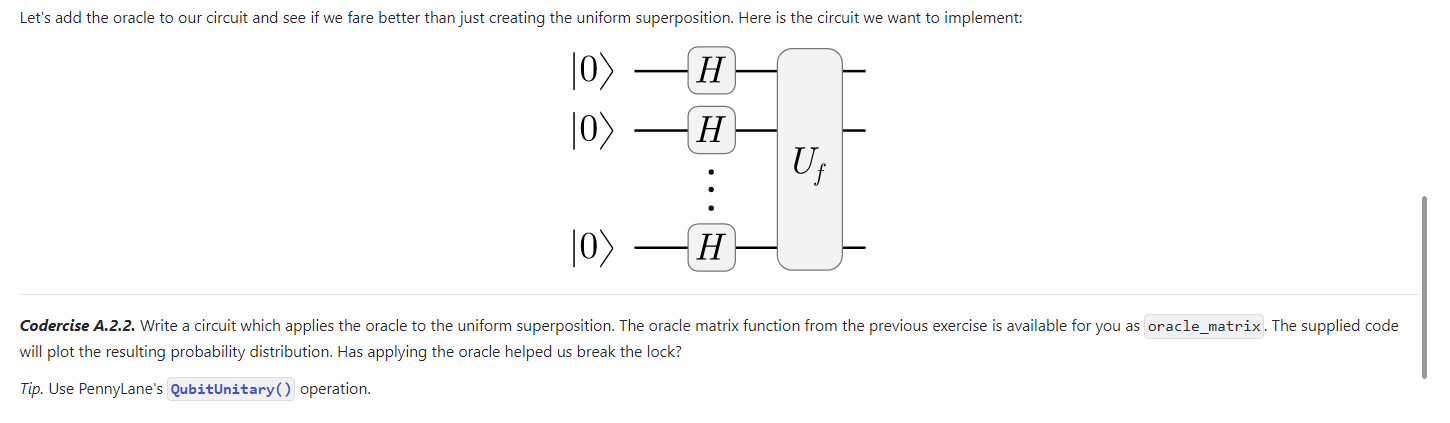

In [85]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def oracle_circuit(combo):
    """Create a uniform superposition, apply the oracle, and return probabilities.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: The output probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    return qml.probs(wires=range(n_bits))


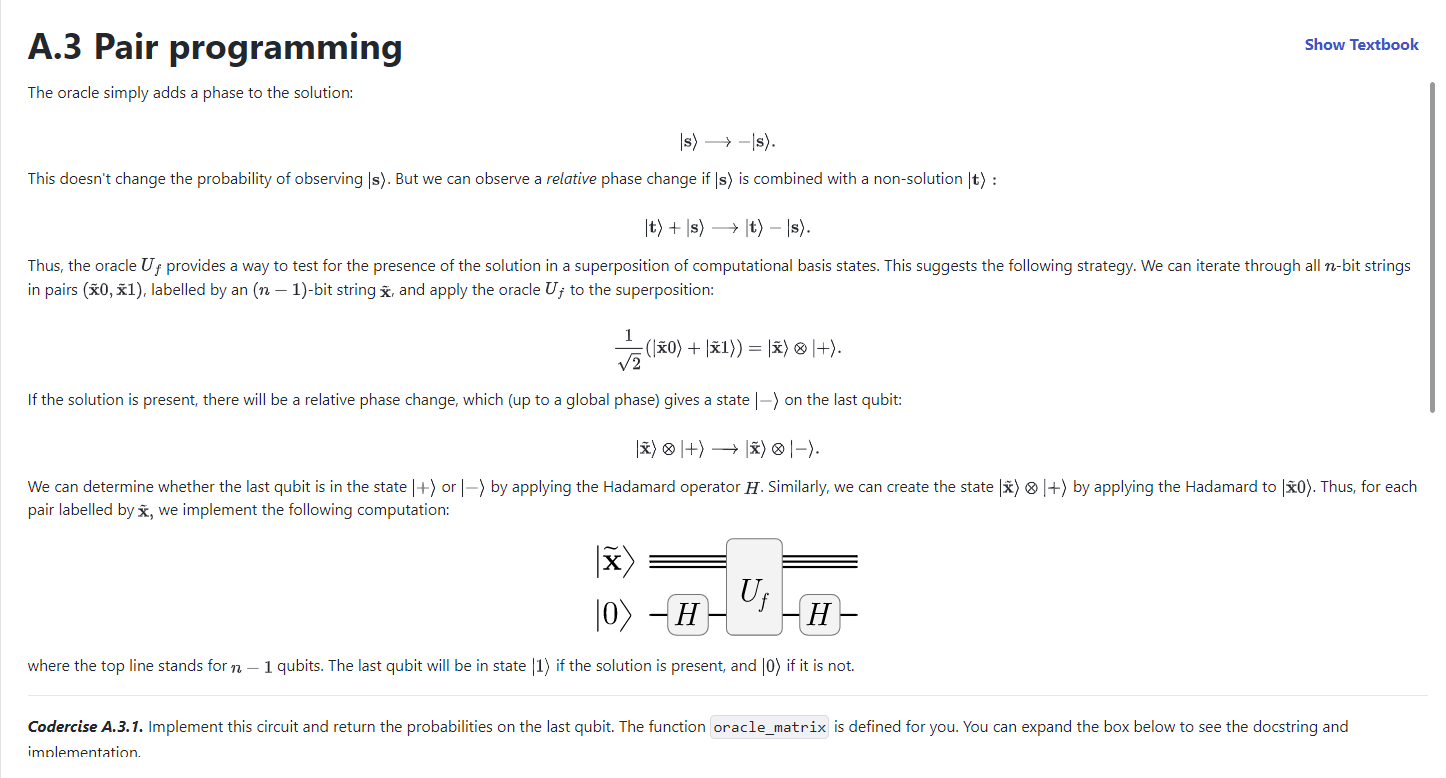

In [86]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def pair_circuit(x_tilde, combo):
    """Test a pair labelled by x_tilde for the presence of a solution.
    
    Args:
        x_tilde (list[int]): An (n_bits - 1)-string labelling the pair to test.
        combo (list[int]): A secret combination of n_bits 0s and 1s.
        
    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits-1): # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=n_bits-1)
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    qml.Hadamard(wires=n_bits-1)

    return qml.probs(wires=n_bits-1)


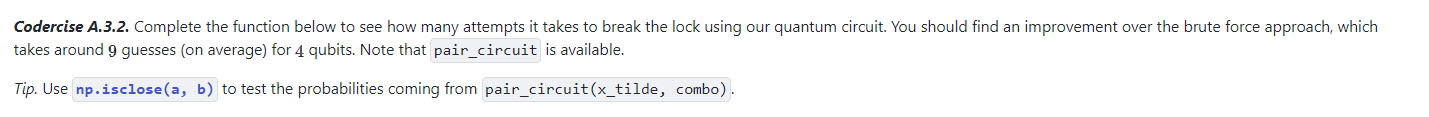

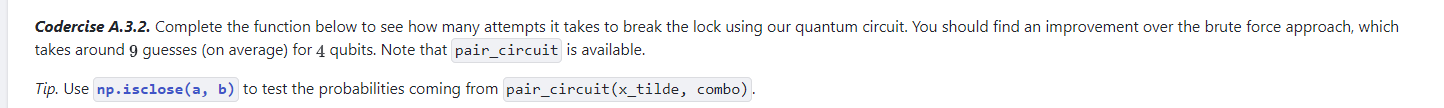

In [87]:
def pair_lock_picker(trials):
    """Create a combo, run pair_circuit until it succeeds, and tally success rate.
    
    Args:
        trials (int): Number of times to test the lock picker.

    Returns:
        float: The average number of times the lock picker uses pair_circuit.
    """
    x_tilde_strs = [np.binary_repr(n, n_bits-1) for n in range(2**(n_bits-1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs] 

    test_numbers = []

    for trial in range(trials):
        combo = secret_combo(n_bits) # Random list of bits
        counter = 0
        for x_tilde in x_tildes:
            counter += 1

            ##################
            # YOUR CODE HERE #
            ##################
            p = pair_circuit(x_tilde, combo)
            if np.isclose(1,p[1]):
                break
        test_numbers.append(counter)
    return sum(test_numbers)/trials

trials = 500
output = pair_lock_picker(trials)

print(f"For {n_bits} bits, it takes", output, "pair tests on average.")


NameError: name 'secret_combo' is not defined

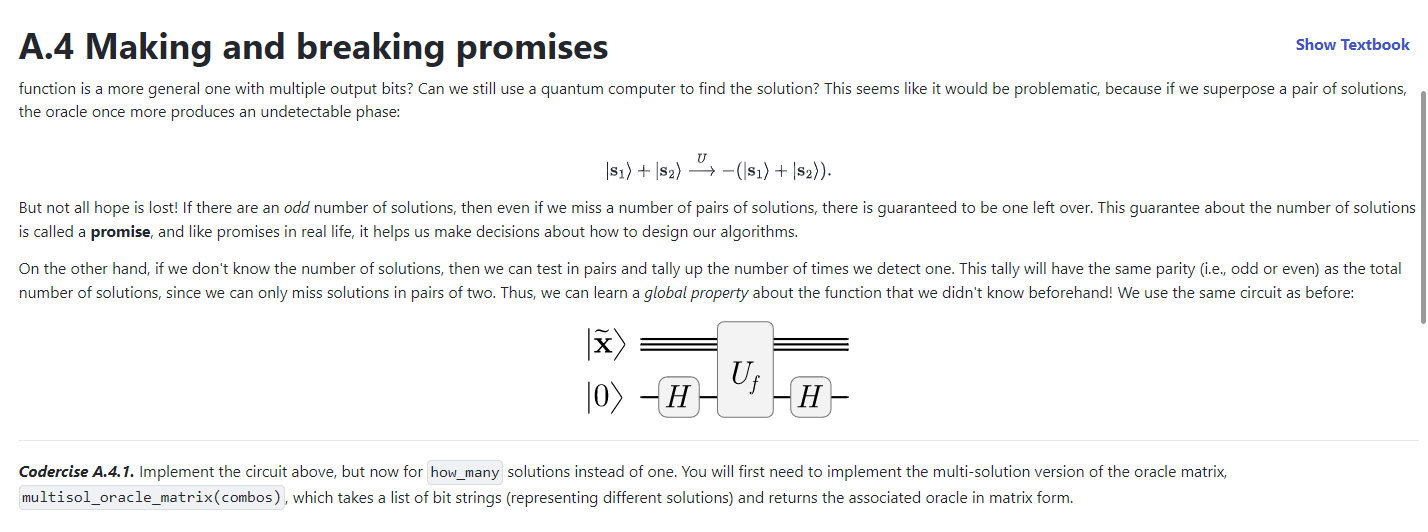

In [ ]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

def multisol_oracle_matrix(combos):
    """Return the oracle matrix for a set of solutions.

    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: The matrix representation of the oracle.
    """
    indices = [np.ravel_multi_index(combo, [2]*len(combo)) for combo in combos]
    ##################
    # YOUR CODE HERE #
    ##################
    array = np.identity(2**len(combos[0]))
    for i in indices:
        array[i,i]=-1
    return array
    
@qml.qnode(dev)
def multisol_pair_circuit(x_tilde, combos):
    """Implements the circuit for testing a pair of combinations labelled by x_tilde.
    
    Args:
        x_tilde (list[int]): An (n_bits - 1)-bit string labelling the pair to test.
        combos (list[list[int]]): A list of secret bit strings.

    Returns:
        array[float]: Probabilities on the last qubit.
    """
    for i in range(n_bits-1): # Initialize x_tilde part of state
        if x_tilde[i] == 1:
            qml.PauliX(wires=i)

    ##################
    # YOUR CODE HERE #
    ##################
    qml.Hadamard(wires=n_bits-1)
    qml.QubitUnitary(multisol_oracle_matrix(combos), wires=[i for i in range(n_bits)])
    qml.Hadamard(wires=n_bits-1)

    return qml.probs(wires=n_bits-1)


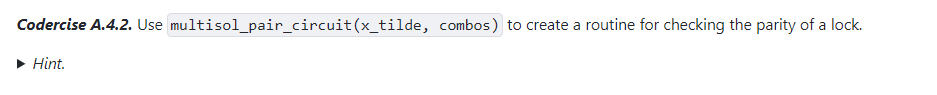

In [88]:
def parity_checker(combos):
    """Use multisol_pair_circuit to determine the parity of a solution set.

    Args:
        combos (list[list[int]]): A list of secret combinations.

    Returns: 
        int: The parity of the solution set.
    """
    parity = 0
    x_tilde_strs = [np.binary_repr(n, n_bits-1) for n in range(2**(n_bits-1))]
    x_tildes = [[int(s) for s in x_tilde_str] for x_tilde_str in x_tilde_strs]
    for x_tilde in x_tildes:

        ##################
        # YOUR CODE HERE #
        ##################

        # IMPLEMENT PARITY COUNTING ALGORITHM
        par_arr = multisol_pair_circuit(x_tilde, combos)
        if np.isclose(1, par_arr[1]):
            parity+=1
    return parity%2


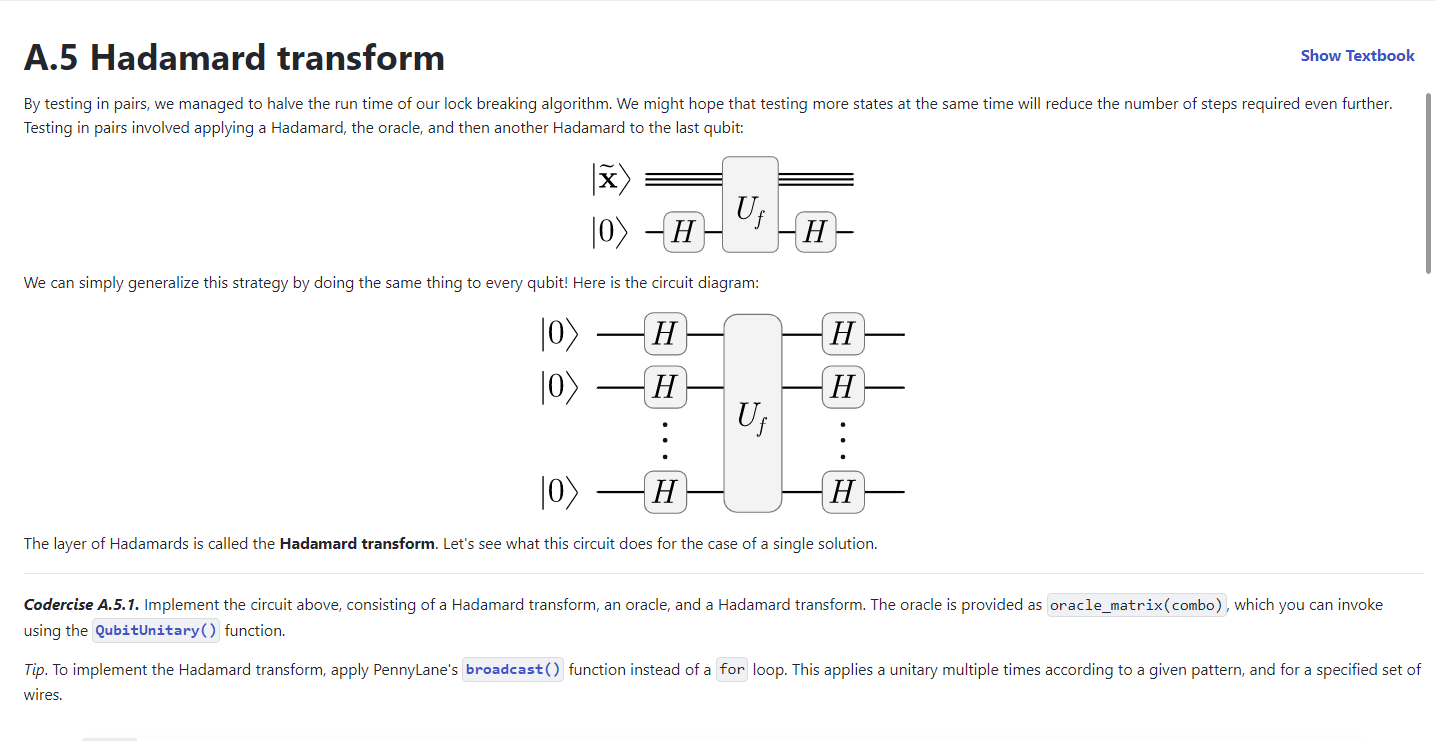

In [89]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def hoh_circuit(combo):
    """A circuit which applies Hadamard-oracle-Hadamard and returns probabilities.
    
    Args:
        combo (list[int]): A list of bits representing a secret combination.

    Returns:
        list[float]: Measurement outcome probabilities.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)
        
    qml.QubitUnitary(oracle_matrix(combo), wires=[i for i in range(n_bits)])
    
    for i in range(n_bits):
        qml.Hadamard(wires=i)
    return qml.probs(wires=range(n_bits))


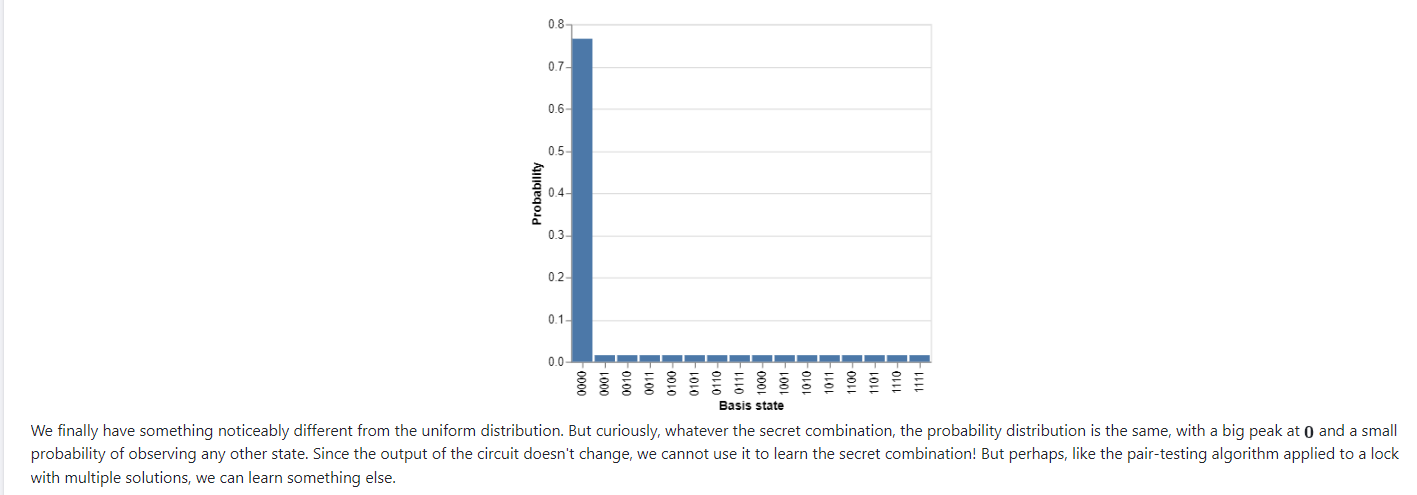

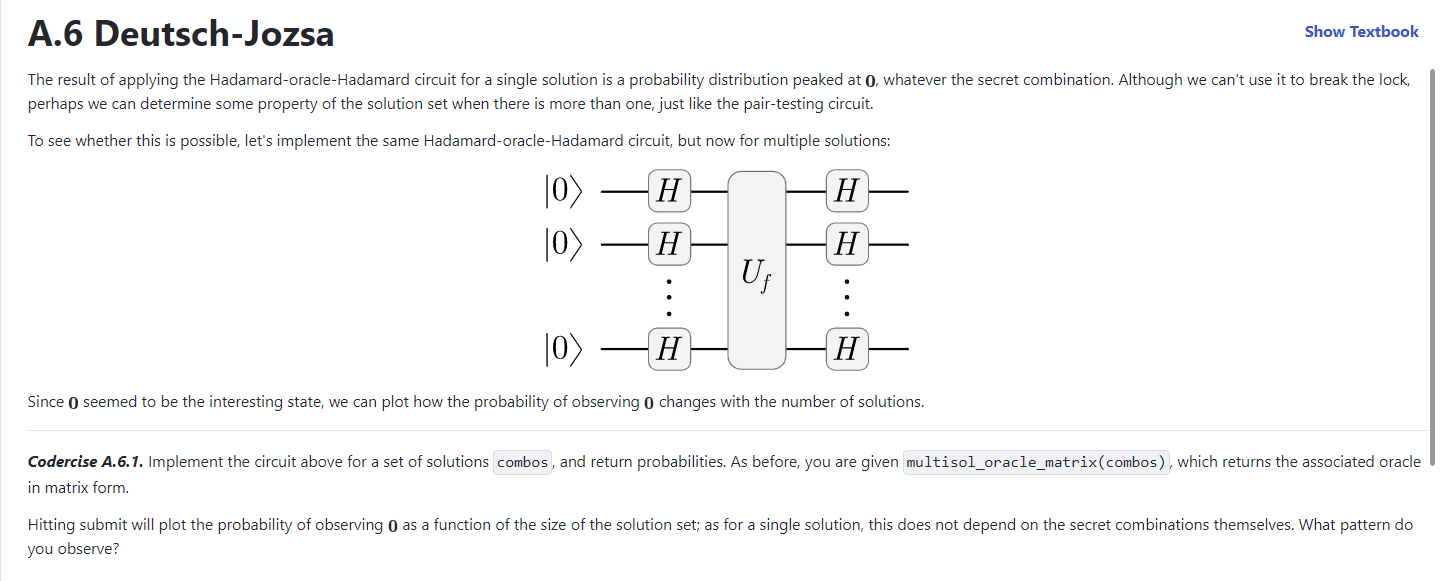

In [90]:
n_bits = 4
dev = qml.device("default.qubit", wires=n_bits)

@qml.qnode(dev)
def multisol_hoh_circuit(combos):
    """A circuit which applies Hadamard, multi-solution oracle, then Hadamard.
    
    Args:
        combos (list[list[int]]): A list of secret bit strings.

    Returns: 
        array[float]: Probabilities for observing different outcomes.
    """

    ##################
    # YOUR CODE HERE #
    ##################
    for i in range(n_bits):
        qml.Hadamard(wires=i)
        
    qml.QubitUnitary(multisol_oracle_matrix(combos), wires=[i for i in range(n_bits)])
    
    for i in range(n_bits):
        qml.Hadamard(wires=i)
        
    return qml.probs(wires=range(n_bits))


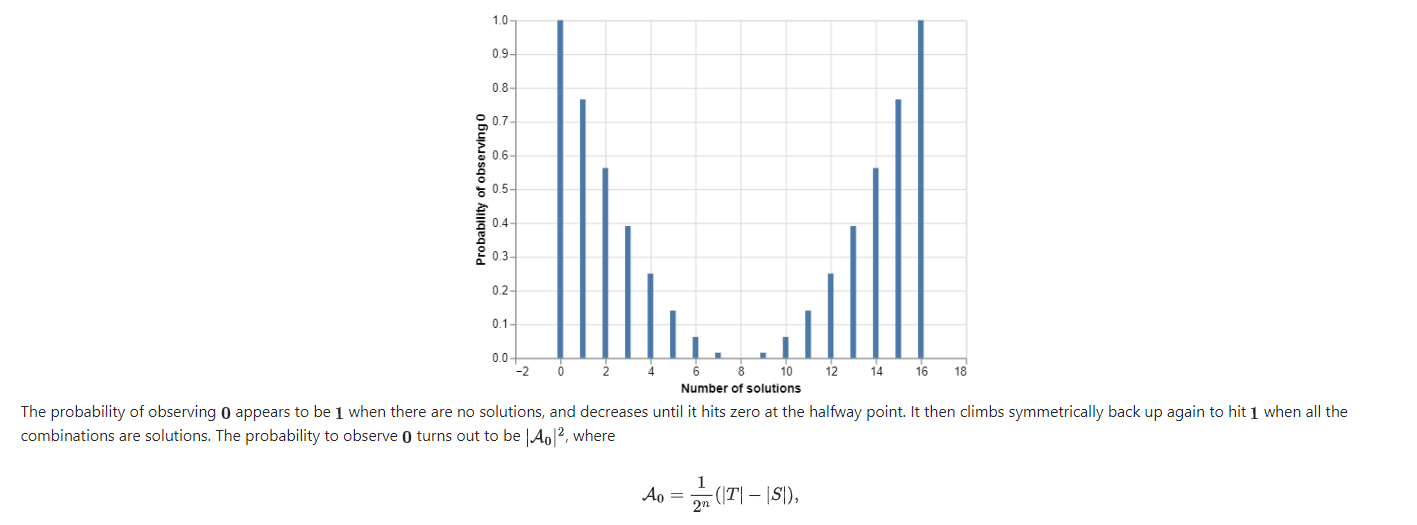
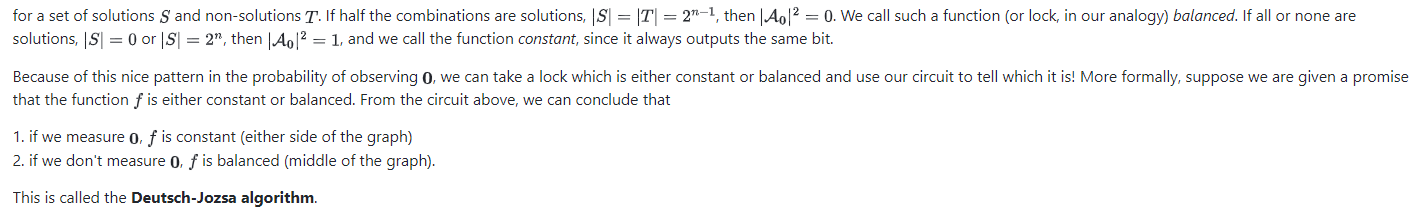

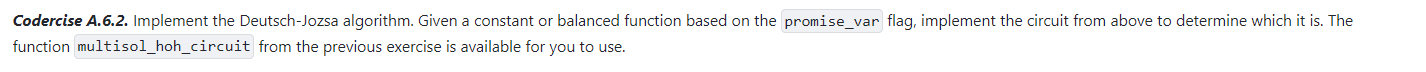

In [91]:
def deutsch_jozsa(promise_var):
    """Implement the Deutsch-Jozsa algorithm and guess the promise variable.
    
    Args:
        promise_var (int): Indicates whether the function is balanced (0) or constant (1).
        
    Returns: 
        int: A guess at the promise variable.
    """
    if promise_var == 0:
        how_many = 2**(n_bits - 1)
    else:
        how_many = np.random.choice([0, 2**n_bits]) # Choose all or nothing randomly
    combos = multisol_combo(n_bits, how_many) # Generate random combinations

    ##################
    # YOUR CODE HERE #
    ##################

    probs = multisol_hoh_circuit(combos)
    if np.isclose(probs[0], 1):
        return 1
    return 0
